## Predicting Hospital Readmissions - Medicare Hospital Compare Data

### There are 6 relevant data sets
#### Target data is included in Readmissions_and_Death.csv. I am using the Readmissions data for all 8 diseases
#### Feature data comes from 6 different data sets. Hospital Names are common to all datasets

In [1104]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [1105]:
death = pd.read_csv('Readmissions_and_Deaths.csv')

In [1106]:
readm_only = death[death['Measure ID'].str.contains('READM')] #excluding mortality
readm_only.info() #dataframe of readmissions only

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38456 entries, 6 to 67297
Data columns (total 19 columns):
Provider ID             38456 non-null int64
Hospital Name           38456 non-null object
Address                 38456 non-null object
City                    38456 non-null object
State                   38456 non-null object
ZIP Code                38456 non-null int64
County Name             38336 non-null object
Phone Number            38456 non-null int64
Measure Name            38456 non-null object
Measure ID              38456 non-null object
Compared to National    38456 non-null object
Denominator             38456 non-null object
Score                   38456 non-null object
Lower Estimate          38456 non-null object
Higher Estimate         38456 non-null object
Footnote                14162 non-null object
Measure Start Date      38456 non-null object
Measure End Date        38456 non-null object
Location                0 non-null float64
dtypes: float64(1), int

## Example of Readmit scores for one random hosp

In [1107]:
abbot = readm_only[readm_only['Hospital Name'] == 'ABBOTT NORTHWESTERN HOSPITAL'] #just grabbing one example to graph

In [1108]:
list_conditions = ['Heart Attack', 'Coronary Artery Bypass', 'COPD', 'Heart Failure', 'Hip/Knee Replacement',
                          'General', 'Pneumonia', 'Stroke']

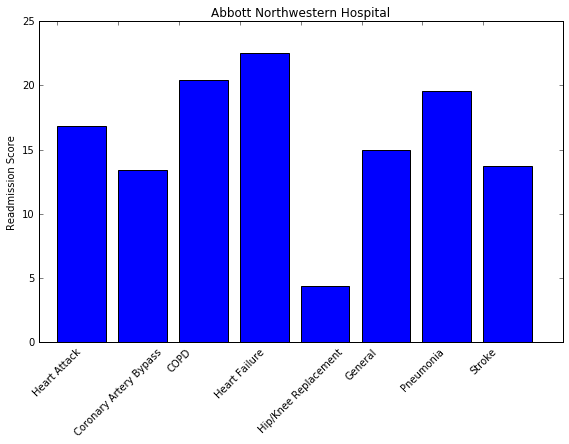

In [1109]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
wid = .3
ind = ind = np.arange(len(abbot.Score))
plt.bar(ind, abbot.Score)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Readmission Score')
plt.title('Abbott Northwestern Hospital')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()

In [1110]:
readm_only.Score.notnull().count()

38456

In [1111]:
readm_only.Score[:1] #Why is this an object and not a float - because of NaNs?

6    16.5
Name: Score, dtype: object

In [1112]:
readm_only.Score.unique() #'Not Available' is screwing this up 

array(['16.5', '15.1', '21.1', '21.4', '5.1', '15.4', '18.7', '12.7',
       '16.7', 'Not Available', '18.0', '21.9', '5.7', '14.9', '16.4',
       '13.4', '16.1', '15.2', '19.8', '20.6', '5.0', '17.9', '12.0',
       '19.9', '16.6', '17.3', '11.3', '19.2', '23.1', '15.7', '16.0',
       '17.7', '15.0', '19.6', '15.3', '23.4', '19.4', '12.8', '15.8',
       '21.5', '14.7', '17.1', '12.4', '23.0', '22.4', '4.1', '15.9',
       '18.3', '13.5', '21.3', '14.8', '18.1', '15.6', '19.5', '23.3',
       '4.7', '18.6', '13.8', '14.0', '17.2', '19.0', '4.9', '16.9',
       '13.0', '16.8', '12.6', '23.2', '5.9', '12.1', '21.6', '16.3',
       '23.7', '20.1', '21.7', '16.2', '22.8', '4.6', '12.5', '3.9',
       '20.3', '24.0', '13.7', '4.8', '12.3', '19.7', '21.0', '6.7',
       '13.1', '20.8', '22.2', '11.2', '14.2', '22.3', '17.5', '20.0',
       '22.5', '4.3', '20.4', '19.1', '14.6', '13.3', '17.8', '22.6',
       '14.1', '18.8', '20.7', '20.9', '20.2', '6.2', '22.9', '13.2',
       '5.5', '15.

In [1113]:
readm_only[readm_only['Score'] == 0] #There are no 0s in this dataframe

Empty DataFrame
Columns: [Provider ID, Hospital Name, Address, City, State, ZIP Code, County Name, Phone Number, Measure Name, Measure ID, Compared to National, Denominator, Score, Lower Estimate, Higher Estimate, Footnote, Measure Start Date, Measure End Date, Location]
Index: []

In [1114]:
z = readm_only['Score'].replace({'Not Available':'0'}) 

In [1115]:
readm_only['Score'] = z.astype(float)

/Users/sheena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1116]:
readm_only.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
dtype: object

In [1117]:
r = pd.pivot_table(readm_only, index=['Hospital Name', 'State'], columns = 'Measure ID', values = 'Score')
#r.index = r.index.droplevel()

In [1118]:
r.head()

Measure ID                             READM_30_AMI  READM_30_CABG  \
Hospital Name                   State                                
ABBEVILLE AREA MEDICAL CENTER   SC              0.0            0.0   
ABBEVILLE GENERAL HOSPITAL      LA              0.0            0.0   
ABBOTT NORTHWESTERN HOSPITAL    MN             16.8           13.4   
ABILENE REGIONAL MEDICAL CENTER TX             16.4           15.0   
ABINGTON MEMORIAL HOSPITAL      PA             18.1           13.9   

Measure ID                             READM_30_COPD  READM_30_HF  \
Hospital Name                   State                               
ABBEVILLE AREA MEDICAL CENTER   SC              20.3         21.1   
ABBEVILLE GENERAL HOSPITAL      LA              19.1         24.6   
ABBOTT NORTHWESTERN HOSPITAL    MN              20.4         22.5   
ABILENE REGIONAL MEDICAL CENTER TX              18.3         22.4   
ABINGTON MEMORIAL HOSPITAL      PA              22.8         21.6   

Measure ID                             READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
Hospital Name                   State                                          
ABBEVILLE AREA MEDICAL CENTER   SC                   4.4                15.7   
ABBEVILLE GENERAL HOSPITAL      LA                   4.2                16.0   
ABBOTT NORTHWESTERN HOSPITAL    MN                   4.4                15.0   
ABILENE REGIONAL MEDICAL CENTER TX                   4.0                14.5   
ABINGTON MEMORIAL HOSPITAL      PA                   5.4                16.2   

Measure ID                             READM_30_PN  READM_30_STK  
Hospital Name                   State                             
ABBEVILLE AREA MEDICAL CENTER   SC            17.3           0.0  
ABBEVILLE GENERAL HOSPITAL      LA            17.8           0.0  
ABBOTT NORTHWESTERN HOSPITAL    MN            19.6          13.7  
ABILENE REGIONAL MEDICAL CENTER TX            15.5          13.5  
ABINGTON MEMORIAL HOSPITAL      PA            16.2          12.3

In [1150]:
r.reset_index(inplace=True)

In [1152]:
for x in r.columns[2:]:
    print x

READM_30_AMI
READM_30_CABG
READM_30_COPD
READM_30_HF
READM_30_HIP_KNEE
READM_30_HOSP_WIDE
READM_30_PN
READM_30_STK


In [1153]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 10 columns):
Hospital Name         4785 non-null object
State                 4785 non-null object
READM_30_AMI          4785 non-null float64
READM_30_CABG         4785 non-null float64
READM_30_COPD         4785 non-null float64
READM_30_HF           4785 non-null float64
READM_30_HIP_KNEE     4785 non-null float64
READM_30_HOSP_WIDE    4785 non-null float64
READM_30_PN           4785 non-null float64
READM_30_STK          4785 non-null float64
dtypes: float64(8), object(2)
memory usage: 373.9+ KB


In [1154]:
lis = []
for x in r.columns[2:]:
    lis.append(r[x].mean(axis=0))

In [1155]:
lis

[7.587412051549975,
 3.0684326018808794,
 15.169155346569163,
 16.659021246952307,
 2.617817833507489,
 14.248333333333317,
 14.55699407871823,
 6.813686868686879]

## Average Readmission Scores per disease

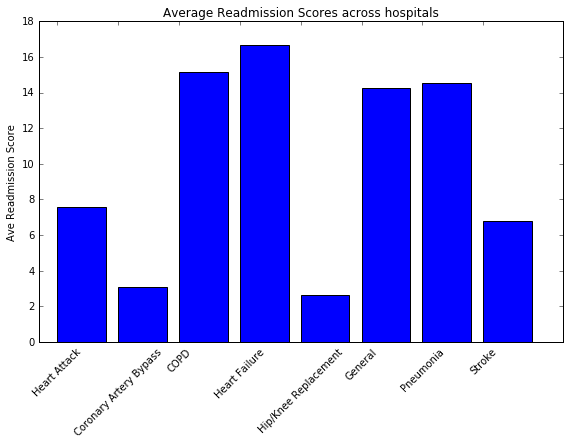

In [1123]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

leng = np.arange(len(lis))
plt.bar(leng, lis)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(leng)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Ave Readmission Score')
plt.title('Average Readmission Scores across hospitals')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()
#HF has a large impact and knee_hip has a smaller impact

## Readmission rates by state

In [1129]:
r['READM_30_HF'].isnull().sum() # No null values in REadmission rates for HD

0

In [1134]:
r[r['READM_30_HF'] == 0 ] #There are some 0 values here but it is unclear if the 0s are missing values or 0s

Measure ID                                                READM_30_AMI  \
Hospital Name                                      State                 
ACADIA ST LANDRY                                   LA              0.0   
AD HOSPITAL EAST, LLC                              TX              0.0   
ADAIR COUNTY MEMORIAL HOSPITAL                     IA              0.0   
ADCARE HOSPITAL OF WORCESTER INC                   MA              0.0   
ADMIN DE SERVICIOS MEDICOS  PUERTO RIC             PR              0.0   
ADVANCED SURGICAL HOSPITAL                         PA              0.0   
ADVENTIST HEALTH MEDICAL CENTER TEHACHAPI VALLEY   CA              0.0   
ADVENTIST HEALTHCARE SHADY GROVE MEDICAL CENTER    MD              0.0   
ADVENTIST HEALTHCARE WASHINGTON ADVENTIST HOSPITAL MD              0.0   
ADVENTIST MEDICAL CENTER - REEDLEY                 CA              0.0   
AKRON CHILDREN'S HOSPITAL                          OH              0.0   
ALFRED I DUPONT HOSPITAL FOR CHILDREN              DE              0.0   
ALICE PECK DAY MEMORIAL HOSPITAL                   NH              0.0   
ALL CHILDREN'S HOSPITAL, INC                       FL              0.0   
ALLEGIANCE SPECIALTY HOSPITAL OF KILGORE           TX              0.0   
ALLEN PARISH HOSPITAL                              LA              0.0   
ALLENDALE COUNTY HOSPITAL                          SC              0.0   
ALLIANCE HEALTH CENTER                             MS              0.0   
ALTUS BAYTOWN HOSPITAL                             TX              0.0   
ANAHEIM GLOBAL MEDICAL CENTER                      CA              0.0   
ANDERSON COUNTY HOSPITAL                           KS              0.0   
ANDERSON RMC SOUTH                                 MS              0.0   
ANIMAS SURGICAL HOSPITAL, LLC                      CO              0.0   
ANN & ROBERT H LURIE CHILDRENS HOSPITAL OF CHICAGO IL              0.0   
ANNE ARUNDEL MEDICAL CENTER                        MD              0.0   
ANNE BATES LEACH EYE HOSPITAL                      FL              0.0   
ANNIE JEFFREY MEMORIAL COUNTY HEALTH CENTER        NE              0.0   
ANSON GENERAL HOSPITAL                             TX              0.0   
ANTELOPE MEMORIAL HOSPITAL                         NE              0.0   
APPLETON MUNICIPAL HOSPITAL                        MN              0.0   
...                                                                ...   
WELLMONT HANCOCK COUNTY HOSPITAL                   TN              0.0   
WELLSPAN SURGERY AND REHABILITATION HOSPITAL       PA              0.0   
WELLSTAR SYLVAN GROVE HOSPITAL                     GA              0.0   
WEST COVINA MEDICAL CENTER, INC                    CA              0.0   
WEST FELICIANA PARISH HOSPITAL                     LA              0.0   
WEST HOLT MEMORIAL HOSPITAL                        NE              0.0   
WEST VALLEY HOSPITAL                               OR              0.0   
WESTERN MARYLAND REGIONAL MEDICAL CENTER           MD              0.0   
WESTFIELD MEMORIAL HOSPITAL, INC                   NY              0.0   
WESTON COUNTY HEALTH SERVICES                      WY              0.0   
WHEATLAND MEMORIAL HOSPITAL                        MT              0.0   
WHITE MOUNTAIN REGIONAL MEDICAL CENTER             AZ              0.0   
WHITERIVER PHS INDIAN HOSPITAL                     AZ              0.0   
WHITFIELD MEDICAL SURGICAL HOSPITAL                MS              0.0   
WICHITA COUNTY HEALTH CENTER                       KS              0.0   
WICKENBURG COMMUNITY HOSPITAL                      AZ              0.0   
WILBARGER GENERAL HOSPITAL                         TX              0.0   
WILLAPA HARBOR HOSPITAL                            WA              0.0   
WILMINGTON TREATMENT CENTER                        NC              0.0   
WILSON MEDICAL CENTER                              KS              0.0   
WINDOM AREA HOSPITAL                               MN              0.0   
WINK

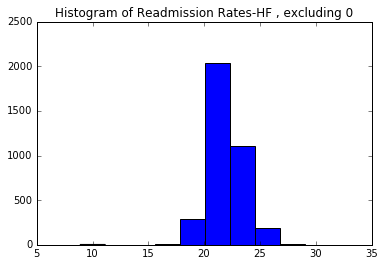

In [1139]:
# is this a normal dist? #Are the 0s real 0s or missing values?
plt.hist(r[r['READM_30_HF'] > 0].READM_30_HF)
plt.title('Histogram of Readmission Rates-HF , excluding 0')
plt.show()

In [1140]:
#is it normal?
from scipy import stats
stats.shapiro(r[r['READM_30_HF'] > 0].READM_30_HF) #Yes data is normal without the 0s.

(0.9685484170913696, 1.6758338818199593e-27)

In [1141]:
# Is data normal with the 0s?
stats.shapiro(r['READM_30_HF']) #Still normal?

(0.65406334400177, 0.0)

In [1176]:
states = list(r.State.unique())
states = sorted(states)
print states #alpha order states

['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


In [1188]:
states_cols = ['State','READM_30_HF']

In [1228]:
#creating dict of states for plotting
states_df = r[states_cols].sort_values('State')
state_hf_target = {}
for i in states:
    state_hf_target[i] = states_df[states_df['State'] == i].READM_30_HF

In [1217]:
state_hf_alpha = {}
for i in states:
    state_hf_alpha[i] = state_hf_target[i].mean()

In [1219]:
state_hf_alpha['AK']

8.831818181818182

In [1380]:
for i in states:
    print "There are %s entries for %s." % (len(state_hf_target[i]), i)

There are 22 entries for AK.
There are 89 entries for AL.
There are 74 entries for AR.
There are 1 entries for AS.
There are 81 entries for AZ.
There are 337 entries for CA.
There are 78 entries for CO.
There are 31 entries for CT.
There are 8 entries for DC.
There are 7 entries for DE.
There are 186 entries for FL.
There are 134 entries for GA.
There are 2 entries for GU.
There are 23 entries for HI.
There are 116 entries for IA.
There are 41 entries for ID.
There are 178 entries for IL.
There are 120 entries for IN.
There are 137 entries for KS.
There are 94 entries for KY.
There are 122 entries for LA.
There are 64 entries for MA.
There are 49 entries for MD.
There are 33 entries for ME.
There are 131 entries for MI.
There are 130 entries for MN.
There are 114 entries for MO.
There are 1 entries for MP.
There are 96 entries for MS.
There are 61 entries for MT.
There are 106 entries for NC.
There are 44 entries for ND.
There are 89 entries for NE.
There are 26 entries for NH.
There a

In [1235]:
import operator
sorted_dict = sorted(state_hf_alpha.items(), key=operator.itemgetter(1))
#Sorting by value of target

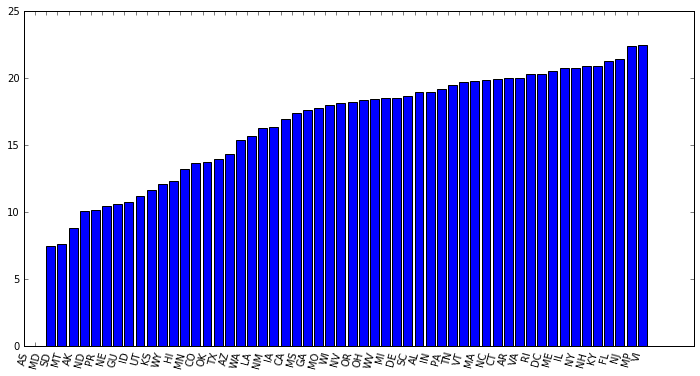

In [1267]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ind = np.arange(len(x_val))
x_val = [x[0] for x in sorted_dict]
y_val = [x[1] for x in sorted_dict]

plt.bar(range(len(y_val)), y_val)
xTickMarks = [i for i in x_val]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=75, fontsize=10)
plt.title('Readmission Rates by State')
plt.show()

In [1367]:
states # Something weird is going on: 6 extra states (DC, GU, MP, PR, VI, AS)

['AK',
 'AL',
 'AR',
 'AS',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MP',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [1266]:
#normalized values by state
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ind = np.arange(len(list1))
wid = .3
plt.bar(ind, list1)
xTickMarks = [i for i in state]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=75, fontsize=10)
plt.title('Readmission rate by state')
plt.ylabel('Readmission rate')
plt.show()

### Feature set 1 - Complications data after Hip/Knee
#### Average complication rates

In [415]:
comp.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name  \
0  Rate of complications for hip/knee replacement...   
1                  Serious blood clots after surgery   
2               Blood stream infection after surgery   
3  A wound that splits open  after surgery on the...   
4   Accidental cuts and tears from medical treatment   

                  Measure ID                 Compared to National Denominator  \
0              COMP_HIP_KNEE  No Different than the National Rate         331   
1  PSI_12_POSTOP_PULMEMB_DVT  No Different than the National Rate        4549   
2         PSI_13_POST_SEPSIS  No Different than the National Rate         578   
3        PSI_14_POSTOP_DEHIS  No Different than the National Rate         445   
4             PSI_15_ACC_LAC  No Different than the National Rate       16429   

  Score Lower Estimate Higher Estimate Footnote Measure Start Date  \
0   3.8            2.6             5.5      NaN         04/01/2012   
1  3.32           1.25            5.38      NaN         07/01/2013   
2  5.72           0.00           11.48      NaN         07/01/2013   
3  2.72           0.65            4.79      NaN         07/01/2013   
4  1.35           0.76            1.95      NaN         07/01/2013   

  Measure End Date  Location  
0       03/31/2015       NaN  
1       06/30/2015       NaN  
2       06/30/2015       NaN  
3       06/30/2015       NaN  
4       06/30/2015       NaN

In [416]:
comp.info() #Same problem here with the scores being objects and not floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52877 entries, 0 to 52876
Data columns (total 19 columns):
Provider ID             52877 non-null int64
Hospital Name           52877 non-null object
Address                 52877 non-null object
City                    52877 non-null object
State                   52877 non-null object
ZIP Code                52877 non-null int64
County Name             52712 non-null object
Phone Number            52877 non-null int64
Measure Name            52877 non-null object
Measure ID              52877 non-null object
Compared to National    52877 non-null object
Denominator             52877 non-null object
Score                   52877 non-null object
Lower Estimate          52877 non-null object
Higher Estimate         52877 non-null object
Footnote                21804 non-null object
Measure Start Date      52877 non-null object
Measure End Date        52877 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [417]:
len(comp[comp.Score == 0]) # No 0 values here, so I'm safe to assign Not Availables to 0 

0

In [418]:
comp['Score'].replace('Not Available', 0, inplace=True)

In [419]:
comp['Score'] = comp['Score'].astype(float)
comp.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
dtype: object

#### High and Low end complication rates

In [420]:
na = len(comp[comp['Lower Estimate'] == 'Not Available'])
zero = len(comp[comp['Lower Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Lower Estimates." % (na, zero)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Lower Estimates.


In [421]:
na_h = len(comp[comp['Higher Estimate'] == 'Not Available'])
zero_h = len(comp[comp['Higher Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Higher Estimates." % (na_h, zero_h)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Higher Estimates.


In [422]:
comp['Lower Estimate'] = comp['Lower Estimate'].replace('Not Available', 0)

In [423]:
comp['Lower Estimate'] = comp['Lower Estimate'].astype(float)
comp['Lower Estimate'].dtype

dtype('float64')

In [424]:
comp['Higher Estimate'] = comp['Higher Estimate'].replace('Not Available', 0)
comp['Higher Estimate'] = comp['Higher Estimate'].astype(float)
comp['Higher Estimate'].dtype

dtype('float64')

In [425]:
comp_score.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4785 entries, (ABBEVILLE AREA MEDICAL CENTER, SC) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 11 columns):
COMP_HIP_KNEE                4785 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    4785 non-null float64
PSI_13_POST_SEPSIS           4785 non-null float64
PSI_14_POSTOP_DEHIS          4785 non-null float64
PSI_15_ACC_LAC               4785 non-null float64
PSI_3_ULCER                  4785 non-null float64
PSI_4_SURG_COMP              4785 non-null float64
PSI_6_IAT_PTX                4785 non-null float64
PSI_7_CVCBI                  4785 non-null float64
PSI_8_POST_HIP               4785 non-null float64
PSI_90_SAFETY                4785 non-null float64
dtypes: float64(11)
memory usage: 448.6+ KB


In [426]:
comp_score = pd.pivot_table(comp, index=['Hospital Name', 'State'], columns = 'Measure ID', values = 'Score')
comp_score.head()

Measure ID                             COMP_HIP_KNEE  \
Hospital Name                   State                  
ABBEVILLE AREA MEDICAL CENTER   SC               3.0   
ABBEVILLE GENERAL HOSPITAL      LA               3.0   
ABBOTT NORTHWESTERN HOSPITAL    MN               2.5   
ABILENE REGIONAL MEDICAL CENTER TX               3.1   
ABINGTON MEMORIAL HOSPITAL      PA               4.3   

Measure ID                             PSI_12_POSTOP_PULMEMB_DVT  \
Hospital Name                   State                              
ABBEVILLE AREA MEDICAL CENTER   SC                          0.00   
ABBEVILLE GENERAL HOSPITAL      LA                          6.51   
ABBOTT NORTHWESTERN HOSPITAL    MN                          5.23   
ABILENE REGIONAL MEDICAL CENTER TX                          3.43   
ABINGTON MEMORIAL HOSPITAL      PA                          8.47   

Measure ID                             PSI_13_POST_SEPSIS  \
Hospital Name                   State                       
ABBEVILLE AREA MEDICAL CENTER   SC                   0.00   
ABBEVILLE GENERAL HOSPITAL      LA                   0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN                  11.26   
ABILENE REGIONAL MEDICAL CENTER TX                   6.36   
ABINGTON MEMORIAL HOSPITAL      PA                  10.30   

Measure ID                             PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  \
Hospital Name                   State                                        
ABBEVILLE AREA MEDICAL CENTER   SC                    0.00            0.00   
ABBEVILLE GENERAL HOSPITAL      LA                    2.28            1.69   
ABBOTT NORTHWESTERN HOSPITAL    MN                    1.78            1.96   
ABILENE REGIONAL MEDICAL CENTER TX                    2.21            1.17   
ABINGTON MEMORIAL HOSPITAL      PA                    3.59            1.29   

Measure ID                             PSI_3_ULCER  PSI_4_SURG_COMP  \
Hospital Name                   State                                 
ABBEVILLE AREA MEDICAL CENTER   SC            0.00             0.00   
ABBEVILLE GENERAL HOSPITAL      LA            0.35             0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN            0.10           124.52   
ABILENE REGIONAL MEDICAL CENTER TX            0.16           138.47   
ABINGTON MEMORIAL HOSPITAL      PA            1.09           153.64   

Measure ID                             PSI_6_IAT_PTX  PSI_7_CVCBI  \
Hospital Name                   State                               
ABBEVILLE AREA MEDICAL CENTER   SC              0.00         0.00   
ABBEVILLE GENERAL HOSPITAL      LA              0.39         0.16   
ABBOTT NORTHWESTERN HOSPITAL    MN              0.32         0.11   
ABILENE REGIONAL MEDICAL CENTER TX              0.40         0.12   
ABINGTON MEMORIAL HOSPITAL      PA              0.32         0.13   

Measure ID                             PSI_8_POST_HIP  PSI_90_SAFETY  
Hospital Name                   State                                 
ABBEVILLE AREA MEDICAL CENTER   SC               0.00           0.00  
ABBEVILLE GENERAL HOSPITAL      LA               0.06           1.02  
ABBOTT NORTHWESTERN HOSPITAL    MN               0.06           0.97  
ABILENE REGIONAL MEDICAL CENTER TX               0.06           0.67  
ABINGTON MEMORIAL HOSPITAL      PA               0.06           1.10

In [427]:
comp_low = pd.pivot_table(comp, index=['Hospital Name', 'State'], columns = 'Measure ID', values = 'Lower Estimate')
comp_low.head()

Measure ID                             COMP_HIP_KNEE  \
Hospital Name                   State                  
ABBEVILLE AREA MEDICAL CENTER   SC               1.7   
ABBEVILLE GENERAL HOSPITAL      LA               1.7   
ABBOTT NORTHWESTERN HOSPITAL    MN               1.7   
ABILENE REGIONAL MEDICAL CENTER TX               2.0   
ABINGTON MEMORIAL HOSPITAL      PA               3.3   

Measure ID                             PSI_12_POSTOP_PULMEMB_DVT  \
Hospital Name                   State                              
ABBEVILLE AREA MEDICAL CENTER   SC                          0.00   
ABBEVILLE GENERAL HOSPITAL      LA                          1.67   
ABBOTT NORTHWESTERN HOSPITAL    MN                          3.47   
ABILENE REGIONAL MEDICAL CENTER TX                          0.17   
ABINGTON MEMORIAL HOSPITAL      PA                          6.51   

Measure ID                             PSI_13_POST_SEPSIS  \
Hospital Name                   State                       
ABBEVILLE AREA MEDICAL CENTER   SC                   0.00   
ABBEVILLE GENERAL HOSPITAL      LA                   0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN                   6.15   
ABILENE REGIONAL MEDICAL CENTER TX                   0.00   
ABINGTON MEMORIAL HOSPITAL      PA                   4.19   

Measure ID                             PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  \
Hospital Name                   State                                        
ABBEVILLE AREA MEDICAL CENTER   SC                    0.00            0.00   
ABBEVILLE GENERAL HOSPITAL      LA                    0.00            0.37   
ABBOTT NORTHWESTERN HOSPITAL    MN                    0.00            1.42   
ABILENE REGIONAL MEDICAL CENTER TX                    0.00            0.27   
ABINGTON MEMORIAL HOSPITAL      PA                    1.53            0.75   

Measure ID                             PSI_3_ULCER  PSI_4_SURG_COMP  \
Hospital Name                   State                                 
ABBEVILLE AREA MEDICAL CENTER   SC            0.00             0.00   
ABBEVILLE GENERAL HOSPITAL      LA            0.00             0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN            0.00            92.72   
ABILENE REGIONAL MEDICAL CENTER TX            0.00            92.17   
ABINGTON MEMORIAL HOSPITAL      PA            0.51           117.66   

Measure ID                             PSI_6_IAT_PTX  PSI_7_CVCBI  \
Hospital Name                   State                               
ABBEVILLE AREA MEDICAL CENTER   SC              0.00          0.0   
ABBEVILLE GENERAL HOSPITAL      LA              0.07          0.0   
ABBOTT NORTHWESTERN HOSPITAL    MN              0.09          0.0   
ABILENE REGIONAL MEDICAL CENTER TX              0.12          0.0   
ABINGTON MEMORIAL HOSPITAL      PA              0.09          0.0   

Measure ID                             PSI_8_POST_HIP  PSI_90_SAFETY  
Hospital Name                   State                                 
ABBEVILLE AREA MEDICAL CENTER   SC               0.00           0.00  
ABBEVILLE GENERAL HOSPITAL      LA               0.06           0.57  
ABBOTT NORTHWESTERN HOSPITAL    MN               0.06           0.78  
ABILENE REGIONAL MEDICAL CENTER TX               0.06           0.36  
ABINGTON MEMORIAL HOSPITAL      PA               0.06           0.91

In [428]:
col_list_low = list(comp_low.columns.values)

In [429]:
low_cols = []
for i in col_list_low:
    low_cols.append(i + '_low')
print low_cols

['COMP_HIP_KNEE_low', 'PSI_12_POSTOP_PULMEMB_DVT_low', 'PSI_13_POST_SEPSIS_low', 'PSI_14_POSTOP_DEHIS_low', 'PSI_15_ACC_LAC_low', 'PSI_3_ULCER_low', 'PSI_4_SURG_COMP_low', 'PSI_6_IAT_PTX_low', 'PSI_7_CVCBI_low', 'PSI_8_POST_HIP_low', 'PSI_90_SAFETY_low']


In [430]:
comp_low.columns = low_cols

In [431]:
comp_low.head()

COMP_HIP_KNEE_low  \
Hospital Name                   State                      
ABBEVILLE AREA MEDICAL CENTER   SC                   1.7   
ABBEVILLE GENERAL HOSPITAL      LA                   1.7   
ABBOTT NORTHWESTERN HOSPITAL    MN                   1.7   
ABILENE REGIONAL MEDICAL CENTER TX                   2.0   
ABINGTON MEMORIAL HOSPITAL      PA                   3.3   

                                       PSI_12_POSTOP_PULMEMB_DVT_low  \
Hospital Name                   State                                  
ABBEVILLE AREA MEDICAL CENTER   SC                              0.00   
ABBEVILLE GENERAL HOSPITAL      LA                              1.67   
ABBOTT NORTHWESTERN HOSPITAL    MN                              3.47   
ABILENE REGIONAL MEDICAL CENTER TX                              0.17   
ABINGTON MEMORIAL HOSPITAL      PA                              6.51   

                                       PSI_13_POST_SEPSIS_low  \
Hospital Name                   State                           
ABBEVILLE AREA MEDICAL CENTER   SC                       0.00   
ABBEVILLE GENERAL HOSPITAL      LA                       0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN                       6.15   
ABILENE REGIONAL MEDICAL CENTER TX                       0.00   
ABINGTON MEMORIAL HOSPITAL      PA                       4.19   

                                       PSI_14_POSTOP_DEHIS_low  \
Hospital Name                   State                            
ABBEVILLE AREA MEDICAL CENTER   SC                        0.00   
ABBEVILLE GENERAL HOSPITAL      LA                        0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN                        0.00   
ABILENE REGIONAL MEDICAL CENTER TX                        0.00   
ABINGTON MEMORIAL HOSPITAL      PA                        1.53   

                                       PSI_15_ACC_LAC_low  PSI_3_ULCER_low  \
Hospital Name                   State                                        
ABBEVILLE AREA MEDICAL CENTER   SC                   0.00             0.00   
ABBEVILLE GENERAL HOSPITAL      LA                   0.37             0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN                   1.42             0.00   
ABILENE REGIONAL MEDICAL CENTER TX                   0.27             0.00   
ABINGTON MEMORIAL HOSPITAL      PA                   0.75             0.51   

                                       PSI_4_SURG_COMP_low  PSI_6_IAT_PTX_low  \
Hospital Name                   State                                           
ABBEVILLE AREA MEDICAL CENTER   SC                    0.00               0.00   
ABBEVILLE GENERAL HOSPITAL      LA                    0.00               0.07   
ABBOTT NORTHWESTERN HOSPITAL    MN                   92.72               0.09   
ABILENE REGIONAL MEDICAL CENTER TX                   92.17               0.12   
ABINGTON MEMORIAL HOSPITAL      PA                  117.66               0.09   

                                       PSI_7_CVCBI_low  PSI_8_POST_HIP_low  \
Hospital Name                   State                                        
ABBEVILLE AREA MEDICAL CENTER   SC                 0.0                0.00   
ABBEVILLE GENERAL HOSPITAL      LA                 0.0                0.06   
ABBOTT NORTHWESTERN HOSPITAL    MN                 0.0                0.06   
ABILENE REGIONAL MEDICAL CENTER TX                 0.0                0.06   
ABINGTON MEMORIAL HOSPITAL      PA                 0.0                0.06   

                                       PSI_90_SAFETY_low  
Hospital Name                   State                     
ABBEVILLE AREA MEDICAL CENTER   SC                  0.00  
ABBEVILLE GENERAL HOSPITAL      LA                  0.57  
ABBOTT NORTHWESTERN HOSPITAL    MN                  0.78  
ABILENE REGIONAL MEDICAL CENTER TX                  0.36  
ABINGTON MEMORIAL HOSPITAL      PA                  0.91

In [432]:
comp_high = pd.pivot_table(comp, index=['Hospital Name','State'], columns = 'Measure ID', values = 'Higher Estimate')

In [433]:
col_list_high = list(comp_high.columns.values)

In [434]:
high_cols = []
for i in col_list_high:
    high_cols.append(i + '_high')
print high_cols

['COMP_HIP_KNEE_high', 'PSI_12_POSTOP_PULMEMB_DVT_high', 'PSI_13_POST_SEPSIS_high', 'PSI_14_POSTOP_DEHIS_high', 'PSI_15_ACC_LAC_high', 'PSI_3_ULCER_high', 'PSI_4_SURG_COMP_high', 'PSI_6_IAT_PTX_high', 'PSI_7_CVCBI_high', 'PSI_8_POST_HIP_high', 'PSI_90_SAFETY_high']


In [435]:
comp_high.columns = high_cols

In [436]:
comp_high.head()

COMP_HIP_KNEE_high  \
Hospital Name                   State                       
ABBEVILLE AREA MEDICAL CENTER   SC                    5.2   
ABBEVILLE GENERAL HOSPITAL      LA                    5.0   
ABBOTT NORTHWESTERN HOSPITAL    MN                    3.7   
ABILENE REGIONAL MEDICAL CENTER TX                    4.7   
ABINGTON MEMORIAL HOSPITAL      PA                    5.7   

                                       PSI_12_POSTOP_PULMEMB_DVT_high  \
Hospital Name                   State                                   
ABBEVILLE AREA MEDICAL CENTER   SC                               0.00   
ABBEVILLE GENERAL HOSPITAL      LA                              11.34   
ABBOTT NORTHWESTERN HOSPITAL    MN                               6.99   
ABILENE REGIONAL MEDICAL CENTER TX                               6.68   
ABINGTON MEMORIAL HOSPITAL      PA                              10.43   

                                       PSI_13_POST_SEPSIS_high  \
Hospital Name                   State                            
ABBEVILLE AREA MEDICAL CENTER   SC                        0.00   
ABBEVILLE GENERAL HOSPITAL      LA                        0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN                       16.38   
ABILENE REGIONAL MEDICAL CENTER TX                       12.96   
ABINGTON MEMORIAL HOSPITAL      PA                       16.42   

                                       PSI_14_POSTOP_DEHIS_high  \
Hospital Name                   State                             
ABBEVILLE AREA MEDICAL CENTER   SC                         0.00   
ABBEVILLE GENERAL HOSPITAL      LA                         4.60   
ABBOTT NORTHWESTERN HOSPITAL    MN                         3.83   
ABILENE REGIONAL MEDICAL CENTER TX                         4.49   
ABINGTON MEMORIAL HOSPITAL      PA                         5.65   

                                       PSI_15_ACC_LAC_high  PSI_3_ULCER_high  \
Hospital Name                   State                                          
ABBEVILLE AREA MEDICAL CENTER   SC                    0.00              0.00   
ABBEVILLE GENERAL HOSPITAL      LA                    3.02              1.65   
ABBOTT NORTHWESTERN HOSPITAL    MN                    2.49              0.80   
ABILENE REGIONAL MEDICAL CENTER TX                    2.08              1.04   
ABINGTON MEMORIAL HOSPITAL      PA                    1.83              1.67   

                                       PSI_4_SURG_COMP_high  \
Hospital Name                   State                         
ABBEVILLE AREA MEDICAL CENTER   SC                     0.00   
ABBEVILLE GENERAL HOSPITAL      LA                     0.00   
ABBOTT NORTHWESTERN HOSPITAL    MN                   156.32   
ABILENE REGIONAL MEDICAL CENTER TX                   184.78   
ABINGTON MEMORIAL HOSPITAL      PA                   189.61   

                                       PSI_6_IAT_PTX_high  PSI_7_CVCBI_high  \
Hospital Name                   State                                         
ABBEVILLE AREA MEDICAL CENTER   SC                   0.00              0.00   
ABBEVILLE GENERAL HOSPITAL      LA                   0.71              0.47   
ABBOTT NORTHWESTERN HOSPITAL    MN                   0.54              0.32   
ABILENE REGIONAL MEDICAL CENTER TX                   0.68              0.40   
ABINGTON MEMORIAL HOSPITAL      PA                   0.54              0.35   

                                       PSI_8_POST_HIP_high  PSI_90_SAFETY_high  
Hospital Name                   State                                           
ABBEVILLE AREA MEDICAL CENTER   SC                    0.00                0.00  
ABBEVILLE GENERAL HOSPITAL      LA                    0.06                1.47  
ABBOTT NORTHWESTERN HOSPITAL    MN                    0.06                1.16  
ABILENE REGIONAL MEDICAL CENTER TX                    0.06                0.98  
ABINGTON MEMORIAL HOSPITAL      PA                    0.06                1.30

#### Features from Hospital-Acquired_Condition_Reduction_Program

In [437]:
reduc = pd.read_csv('Hospital-Acquired_Condition_Reduction_Program.csv')
reduc.head()

Hospital_Name  Provider ID State  Fiscal Year  \
0             ADVENTIST MEDICAL CENTER        50121    CA         2017   
1                     DAMERON HOSPITAL        50122    CA         2017   
2           USC VERDUGO HILLS HOSPITAL        50124    CA         2017   
3  REGIONAL MEDICAL CENTER OF SAN JOSE        50125    CA         2017   
4         VALLEY PRESBYTERIAN HOSPITAL        50126    CA         2017   

   Domain_1_Score  Domain_1_Score_Footnote Domain_1_Start_Date  \
0             3.0                      NaN           01-JUL-13   
1            10.0                      NaN           01-JUL-13   
2             4.0                      NaN           01-JUL-13   
3             9.0                      NaN           01-JUL-13   
4             8.0                      NaN           01-JUL-13   

  Domain_1_End_Date  AHRQ_PSI_90_Score  AHRQ_PSI_90_Score_Footnote  \
0         30-JUN-15                3.0                         NaN   
1         30-JUN-15               10.0                         NaN   
2         30-JUN-15                4.0                         NaN   
3         30-JUN-15                9.0                         NaN   
4         30-JUN-15                8.0                         NaN   

              ...              MRSA_Score  MRSA_Footnote  CDI_Score  \
0             ...                     4.0            NaN        5.0   
1             ...                    10.0            NaN        9.0   
2             ...                     4.0            NaN        5.0   
3             ...                     9.0            NaN        8.0   
4             ...                     8.0            NaN        8.0   

   CDI_Footnote  Domain_2_Start_Date  Domain_2_End_Date  Total_HAC_Score  \
0           NaN            01-JAN-14          31-DEC-15             7.08   
1           NaN            01-JAN-14          31-DEC-15             8.13   
2           NaN            01-JAN-14          31-DEC-15             5.70   
3           NaN            01-JAN-14          31-DEC-15             8.83   
4           NaN            01-JAN-14          31-DEC-15             7.32   

   Total_HAC_Score_Footnote  Payment_Reduction  Payment_Reduction_Footnote  
0                       NaN                Yes                         NaN  
1                       NaN                Yes                         NaN  
2                       NaN                 No                         NaN  
3                       NaN                Yes                         NaN  
4                       NaN                Yes                         NaN  

[5 rows x 28 columns]

In [438]:
reduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 28 columns):
Hospital_Name                 3313 non-null object
Provider ID                   3313 non-null int64
State                         3313 non-null object
Fiscal Year                   3313 non-null int64
Domain_1_Score                3179 non-null float64
Domain_1_Score_Footnote       134 non-null float64
Domain_1_Start_Date           3313 non-null object
Domain_1_End_Date             3313 non-null object
AHRQ_PSI_90_Score             3216 non-null float64
AHRQ_PSI_90_Score_Footnote    134 non-null float64
Domain_2_Score                3173 non-null float64
Domain_2_Score_Footnote       170 non-null float64
CLABSI_Score                  2296 non-null float64
CLABSI_Score_Footnote         1034 non-null float64
CAUTI_Score                   2581 non-null float64
CAUTI_Score_Footnote          749 non-null float64
SSI_Score                     2573 non-null float64
SSI_Score_Footnote   

In [439]:
#only grabbing relevant features
feat_list = ['Hospital_Name', 'State', 'AHRQ_PSI_90_Score','CLABSI_Score','CAUTI_Score','SSI_Score','MRSA_Score','CDI_Score']
reduc = reduc[feat_list]
reduc.head()

Hospital_Name State  AHRQ_PSI_90_Score  CLABSI_Score  \
0             ADVENTIST MEDICAL CENTER    CA                3.0          10.0   
1                     DAMERON HOSPITAL    CA               10.0           8.0   
2           USC VERDUGO HILLS HOSPITAL    CA                4.0          10.0   
3  REGIONAL MEDICAL CENTER OF SAN JOSE    CA                9.0           9.0   
4         VALLEY PRESBYTERIAN HOSPITAL    CA                8.0           8.0   

   CAUTI_Score  SSI_Score  MRSA_Score  CDI_Score  
0         10.0       10.0         4.0        5.0  
1          9.0        3.0        10.0        9.0  
2          9.0        2.0         4.0        5.0  
3          9.0        9.0         9.0        8.0  
4          4.0        8.0         8.0        8.0

In [1390]:
feat_list[2:]

['AHRQ_PSI_90_Score',
 'CLABSI_Score',
 'CAUTI_Score',
 'SSI_Score',
 'MRSA_Score',
 'CDI_Score']

In [1393]:
for f in feat_list[2:]:
    null = reduc[f].isnull().sum()
    temp_zero = len(reduc[reduc[f] == 0]) 
    print "There are %s null values, 0 appears %s times for %s." % (null, temp_zero, f)
    #Nans exists here too but there are no 0s

There are 0 null values, 0 appears 97 times for AHRQ_PSI_90_Score.
There are 0 null values, 0 appears 1017 times for CLABSI_Score.
There are 0 null values, 0 appears 732 times for CAUTI_Score.
There are 0 null values, 0 appears 740 times for SSI_Score.
There are 0 null values, 0 appears 940 times for MRSA_Score.
There are 0 null values, 0 appears 152 times for CDI_Score.


In [441]:
for f in feat_list[1:]:
    reduc[f].fillna(value=0,inplace=True)

In [442]:
reduc.info() #Replaced the null values. Don't need to pivot this table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 8 columns):
Hospital_Name        3313 non-null object
State                3313 non-null object
AHRQ_PSI_90_Score    3313 non-null float64
CLABSI_Score         3313 non-null float64
CAUTI_Score          3313 non-null float64
SSI_Score            3313 non-null float64
MRSA_Score           3313 non-null float64
CDI_Score            3313 non-null float64
dtypes: float64(6), object(2)
memory usage: 207.1+ KB


#### Features related to spending by claim 

In [1394]:
spending = pd.read_csv('Medicare_Hospital_Spending_by_Claim.csv')
spending.head()

Hospital_Name  Provider_ID State  \
0  HELEN KELLER HOSPITAL        10019    AL   
1  HELEN KELLER HOSPITAL        10019    AL   
2  HELEN KELLER HOSPITAL        10019    AL   
3  HELEN KELLER HOSPITAL        10019    AL   
4  HELEN KELLER HOSPITAL        10019    AL   

                                              Period  \
0                    During Index Hospital Admission   
1                    During Index Hospital Admission   
2                    During Index Hospital Admission   
3  1 through 30 days After Discharge from Index H...   
4  1 through 30 days After Discharge from Index H...   

                  Claim_Type Avg_Spending_Per_Episode_Hospital  \
0   Skilled Nursing Facility                             $0.00   
1  Durable Medical Equipment                            $18.00   
2                    Carrier                          $1062.00   
3         Home Health Agency                           $917.00   
4                    Hospice                           $172.00   

  Avg_Spending_Per_Episode_State Avg_Spending_Per_Episode_Nation  \
0                          $0.00                           $0.00   
1                         $31.00                          $24.00   
2                       $1480.00                        $1540.00   
3                        $948.00                         $816.00   
4                        $154.00                         $122.00   

  Percent_of_Spending_Hospital Percent_of_Spending_State  \
0                           0%                        0%   
1                         0.1%                     0.16%   
2                        6.01%                     7.71%   
3                        5.19%                     4.94%   
4                        0.97%                      0.8%   

  Percent_of_Spending_Nation  
0                         0%  
1                      0.12%  
2                      7.52%  
3                      3.98%  
4                       0.6%

In [1395]:
spending = spending[(spending['Claim_Type'] == 'Inpatient') | (spending['Claim_Type'] == 'Outpatient') ]

In [1396]:
spending = spending[(spending['Period'] == '1 through 30 days After Discharge from Index Hospital Admission') | 
                    (spending['Period'] == '1 to 3 days Prior to Index Hospital Admission') |
                    (spending['Period'] == 'During Index Hospital Admission')]

In [1397]:
spending['Avg_Spending_Per_Episode_Hospital'] = (spending.Avg_Spending_Per_Episode_Hospital.str.replace('$', ' ')).astype(float) 
#Removing $, convert to float

In [1398]:
spending.Avg_Spending_Per_Episode_Hospital.isnull().sum() #No missing values here

0

In [1402]:
len(spending[spending['Avg_Spending_Per_Episode_Hospital'] == 0])

4616

In [1399]:
spending.Avg_Spending_Per_Episode_Hospital.unique()

array([  2518.,    473.,     12., ...,   1140.,  10706.,   9437.])

In [449]:
spending_in = spending[spending['Claim_Type'] == 'Inpatient']
spending_out = spending[spending['Claim_Type'] == 'Outpatient']

In [528]:
spending_in_pivot = pd.pivot_table(spending_in, index=['Hospital_Name', 'State'], columns='Period', values='Avg_Spending_Per_Episode_Hospital')

In [529]:
spending_in_pivot_col = list(spending_in_pivot.columns.values)
spending_in_cols = []
for i in spending_in_pivot.columns:
    spending_in_cols.append(i + '_inpatient')
print spending_in_cols

['1 through 30 days After Discharge from Index Hospital Admission_inpatient', '1 to 3 days Prior to Index Hospital Admission_inpatient', 'During Index Hospital Admission_inpatient']


In [530]:
spending_in_pivot.columns = spending_in_cols

In [531]:
spending_in_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3156 entries, (ABBEVILLE GENERAL HOSPITAL, LA) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
1 through 30 days After Discharge from Index Hospital Admission_inpatient    3156 non-null float64
1 to 3 days Prior to Index Hospital Admission_inpatient                      3156 non-null float64
During Index Hospital Admission_inpatient                                    3156 non-null float64
dtypes: float64(3)
memory usage: 98.6+ KB


In [ ]:
#There are no null values here but I want to check for 0s and for 'Not Availables'. In this case 0 isn't necessarily
# a missing value. There shouldn't be zeros in the During Index Hospital Admission column

In [1407]:
for x in ['1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
          '1 to 3 days Prior to Index Hospital Admission_inpatient', 'During Index Hospital Admission_inpatient']:
    print len(spending_in_pivot[spending_in_pivot[x] == 0])

4
1438
0


In [522]:
spending_out_pivot = pd.pivot_table(spending_out, index=['Hospital_Name','State'], columns='Period', values='Avg_Spending_Per_Episode_Hospital')

In [523]:
spending_out_pivot_col = list(spending_out_pivot.columns.values)
spending_out_cols = []
for i in spending_out_pivot.columns:
    spending_out_cols.append(i + '_outpatient')
print spending_out_cols

['1 through 30 days After Discharge from Index Hospital Admission_outpatient', '1 to 3 days Prior to Index Hospital Admission_outpatient', 'During Index Hospital Admission_outpatient']


In [525]:
spending_out_pivot.columns = spending_out_cols

In [532]:
spending_out_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3156 entries, (ABBEVILLE GENERAL HOSPITAL, LA) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
1 through 30 days After Discharge from Index Hospital Admission_outpatient    3156 non-null float64
1 to 3 days Prior to Index Hospital Admission_outpatient                      3156 non-null float64
During Index Hospital Admission_outpatient                                    3156 non-null float64
dtypes: float64(3)
memory usage: 98.6+ KB


In [787]:
spending_out_pivot.head()

1 through 30 days After Discharge from Index Hospital Admission_outpatient  \
Hospital_Name                     State                                                                               
ABBEVILLE GENERAL HOSPITAL        LA                                                 776.0                            
ABBOTT NORTHWESTERN HOSPITAL      MN                                                 903.0                            
ABILENE REGIONAL MEDICAL CENTER   TX                                                 622.0                            
ABINGTON HEALTH LANSDALE HOSPITAL PA                                                 602.0                            
ABINGTON MEMORIAL HOSPITAL        PA                                                 666.0                            

                                         1 to 3 days Prior to Index Hospital Admission_outpatient  \
Hospital_Name                     State                                                             
ABBEVILLE GENERAL HOSPITAL        LA                                                  41.0          
ABBOTT NORTHWESTERN HOSPITAL      MN                                                 543.0          
ABILENE REGIONAL MEDICAL CENTER   TX                                                 246.0          
ABINGTON HEALTH LANSDALE HOSPITAL PA                                                  27.0          
ABINGTON MEMORIAL HOSPITAL        PA                                                  45.0          

                                         During Index Hospital Admission_outpatient  
Hospital_Name                     State                                              
ABBEVILLE GENERAL HOSPITAL        LA                                            0.0  
ABBOTT NORTHWESTERN HOSPITAL      MN                                            0.0  
ABILENE REGIONAL MEDICAL CENTER   TX                                            0.0  
ABINGTON HEALTH LANSDALE HOSPITAL PA                                            0.0  
ABINGTON MEMORIAL HOSPITAL        PA                                            0.0

In [789]:
spending_out_pivot.drop('During Index Hospital Admission_outpatient', axis=1, inplace=True)
#Dropping this column - its all zeros because there is not inpatient spending for outpatient care!!

In [790]:
spending_out_pivot.head()

1 through 30 days After Discharge from Index Hospital Admission_outpatient  \
Hospital_Name                     State                                                                               
ABBEVILLE GENERAL HOSPITAL        LA                                                 776.0                            
ABBOTT NORTHWESTERN HOSPITAL      MN                                                 903.0                            
ABILENE REGIONAL MEDICAL CENTER   TX                                                 622.0                            
ABINGTON HEALTH LANSDALE HOSPITAL PA                                                 602.0                            
ABINGTON MEMORIAL HOSPITAL        PA                                                 666.0                            

                                         1 to 3 days Prior to Index Hospital Admission_outpatient  
Hospital_Name                     State                                                            
ABBEVILLE GENERAL HOSPITAL        LA                                                  41.0         
ABBOTT NORTHWESTERN HOSPITAL      MN                                                 543.0         
ABILENE REGIONAL MEDICAL CENTER   TX                                                 246.0         
ABINGTON HEALTH LANSDALE HOSPITAL PA                                                  27.0         
ABINGTON MEMORIAL HOSPITAL        PA                                                  45.0

In [1410]:
for x in ['1 through 30 days After Discharge from Index Hospital Admission_outpatient', 
          '1 to 3 days Prior to Index Hospital Admission_outpatient']:
    print len(spending_out_pivot[spending_out_pivot[x] == 0])

0
4


#### Spending by Claim (HF, AMI, PN)

In [455]:
pay = pd.read_csv('Payment_and_value_of_care_-_Hospital.csv')
pay.head()

Provider ID                   Hospital name                     Address  \
0        10005   MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
1        10005   MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10005   MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
3        10012  DEKALB REGIONAL MEDICAL CENTER        200 MED CENTER DRIVE   
4        10012  DEKALB REGIONAL MEDICAL CENTER        200 MED CENTER DRIVE   

         City State  ZIP Code County name  Phone number  \
0        BOAZ    AL     35957    MARSHALL    2565938310   
1        BOAZ    AL     35957    MARSHALL    2565938310   
2        BOAZ    AL     35957    MARSHALL    2565938310   
3  FORT PAYNE    AL     35968     DE KALB    2568453150   
4  FORT PAYNE    AL     35968     DE KALB    2568453150   

                 Payment measure name Payment measure ID  \
0   Payment for heart attack patients        PAYM_30_AMI   
1  Payment for heart failure patients         PAYM_30_HF   
2      Payment for pneumonia patients         PAYM_30_PN   
3   Payment for heart attack patients        PAYM_30_AMI   
4  Payment for heart failure patients         PAYM_30_HF   

                       ...                      Lower estimate  \
0                      ...                             $20,404   
1                      ...                             $15,237   
2                      ...                             $13,642   
3                      ...                             $20,910   
4                      ...                             $15,113   

  Higher estimate Payment footnote           Value of care display name  \
0         $26,226              NaN   Value of Care Heart Attack measure   
1         $17,547              NaN  Value of Care Heart Failure measure   
2         $15,118              NaN      Value of Care Pneumonia measure   
3         $25,353              NaN   Value of Care Heart Attack measure   
4         $18,491              NaN  Value of Care Heart Failure measure   

  Value of care display ID                 Value of care category  \
0         MORT_PAYM_30_AMI  Average mortality and average payment   
1          MORT_PAYM_30_HF    Worse mortality and average payment   
2          MORT_PAYM_30_PN    Worse mortality and average payment   
3         MORT_PAYM_30_AMI  Average mortality and average payment   
4          MORT_PAYM_30_HF  Average mortality and average payment   

  Value of care footnote Measure start date Measure End Date  \
0                    NaN         07/01/2012       06/30/2015   
1                    NaN         07/01/2012       06/30/2015   
2                    NaN         07/01/2012       06/30/2015   
3                    NaN         07/01/2012       06/30/2015   
4                    NaN         07/01/2012       06/30/2015   

                                       Location  
0  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
1  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
2  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
3  200 MED CENTER DRIVE\nFORT PAYNE, AL 35968\n  
4  200 MED CENTER DRIVE\nFORT PAYNE, AL 35968\n  

[5 rows x 23 columns]

In [456]:
pay_feat_list = ['Hospital name', 'State', 'Payment measure ID', 'Payment', 'Lower estimate', 'Higher estimate']
pay = pay[pay_feat_list]
pay.head ()

Hospital name State Payment measure ID  Payment  \
0   MARSHALL MEDICAL CENTER SOUTH    AL        PAYM_30_AMI  $23,171   
1   MARSHALL MEDICAL CENTER SOUTH    AL         PAYM_30_HF  $16,376   
2   MARSHALL MEDICAL CENTER SOUTH    AL         PAYM_30_PN  $14,384   
3  DEKALB REGIONAL MEDICAL CENTER    AL        PAYM_30_AMI  $22,997   
4  DEKALB REGIONAL MEDICAL CENTER    AL         PAYM_30_HF  $16,722   

  Lower estimate Higher estimate  
0        $20,404         $26,226  
1        $15,237         $17,547  
2        $13,642         $15,118  
3        $20,910         $25,353  
4        $15,113         $18,491

In [457]:
for f in pay_feat_list[3:6]:
    null = pay[f].isnull().sum()
    temp_zero = len(pay[pay[f] == 0]) 
    temp_na = len(pay[pay[f] == 'Not Available']) 
    print "There are %s null values, %s 'Not Availables' and 0 appears %s times for %s." % (null, temp_na, temp_zero, f)
    #Nans exists here too but there are no 0s

There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Payment.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Lower estimate.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Higher estimate.


In [458]:
#Since there are no 0s, I will fill in Not Availables with 0
for f in pay_feat_list[3:6]:
    null = pay[f].isnull().sum()
    temp_zero = len(pay[pay[f] == 0]) 
    temp_na = len(pay[pay[f] == 'Not Available']) 
    print "There are %s null values, %s 'Not Availables' and 0 appears %s times for %s." % (null, temp_na, temp_zero, f)

There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Payment.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Lower estimate.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Higher estimate.


In [459]:
for col in pay.columns[3:6]:
    pay[col] = pay[col].replace({'Not Available':'0'})

In [460]:
for col in pay.columns[3:6]:
    pay[col] = (pay[col].str.replace('$', ''))
    pay[col] = (pay[col].str.replace(',', ''))
    pay[col] = pay[col].astype(float)

In [461]:
pay.head()

Hospital name State Payment measure ID  Payment  \
0   MARSHALL MEDICAL CENTER SOUTH    AL        PAYM_30_AMI  23171.0   
1   MARSHALL MEDICAL CENTER SOUTH    AL         PAYM_30_HF  16376.0   
2   MARSHALL MEDICAL CENTER SOUTH    AL         PAYM_30_PN  14384.0   
3  DEKALB REGIONAL MEDICAL CENTER    AL        PAYM_30_AMI  22997.0   
4  DEKALB REGIONAL MEDICAL CENTER    AL         PAYM_30_HF  16722.0   

   Lower estimate  Higher estimate  
0         20404.0          26226.0  
1         15237.0          17547.0  
2         13642.0          15118.0  
3         20910.0          25353.0  
4         15113.0          18491.0

In [462]:
#Create 2 pivot tables
pay_pay = pd.pivot_table(pay, index=['Hospital name','State'], columns = 'Payment measure ID', values='Payment')
pay_pay.head()

Payment measure ID                     PAYM_30_AMI  PAYM_30_HF  PAYM_30_PN
Hospital name                   State                                     
ABBEVILLE AREA MEDICAL CENTER   SC             0.0     14185.0     11981.0
ABBEVILLE GENERAL HOSPITAL      LA             0.0     17578.0     14218.0
ABBOTT NORTHWESTERN HOSPITAL    MN         21099.0     17110.0     14609.0
ABILENE REGIONAL MEDICAL CENTER TX         21553.0     17531.0     15194.0
ABINGTON MEMORIAL HOSPITAL      PA         23950.0     17047.0     14605.0

In [463]:
#Creating low estimate table
pay_low = pd.pivot_table(pay, index=['Hospital name','State'], columns = 'Payment measure ID', values = 'Lower estimate')
pay_low.head()

Payment measure ID                     PAYM_30_AMI  PAYM_30_HF  PAYM_30_PN
Hospital name                   State                                     
ABBEVILLE AREA MEDICAL CENTER   SC             0.0     12159.0     10546.0
ABBEVILLE GENERAL HOSPITAL      LA             0.0     15713.0     12664.0
ABBOTT NORTHWESTERN HOSPITAL    MN         19867.0     16130.0     13399.0
ABILENE REGIONAL MEDICAL CENTER TX         19736.0     16058.0     13938.0
ABINGTON MEMORIAL HOSPITAL      PA         22336.0     16325.0     13905.0

In [464]:
pay_low_cols = list(pay_low.columns.values)

In [465]:
pay_low_col_lis = []
for i in pay_low_cols:
    pay_low_col_lis.append(i + '_low')
print pay_low_col_lis

['PAYM_30_AMI_low', 'PAYM_30_HF_low', 'PAYM_30_PN_low']


In [466]:
pay_low.columns = pay_low_col_lis

import re
def regex(row):
    return re.sub(r"[^0-9]", "", row)

pay['Payment'] = pay.apply(regex, axis=1)

pay['New'] = pay.apply(regex('Payment'), axis=1)

In [467]:
pay_pay.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4785 entries, (ABBEVILLE AREA MEDICAL CENTER, SC) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
PAYM_30_AMI    4785 non-null float64
PAYM_30_HF     4785 non-null float64
PAYM_30_PN     4785 non-null float64
dtypes: float64(3)
memory usage: 149.5+ KB


In [468]:
#Creating a high estimates table
pay_high = pd.pivot_table(pay, index=['Hospital name','State'], columns = 'Payment measure ID', values = 'Higher estimate')
pay_high_cols = list(pay_high.columns.values)
pay_high_col_lis = []
for i in pay_high_cols:
    pay_high_col_lis.append(i + '_high')
print pay_high_col_lis

['PAYM_30_AMI_high', 'PAYM_30_HF_high', 'PAYM_30_PN_high']


In [469]:
pay_high.columns = pay_high_col_lis

In [470]:
pay_high.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4785 entries, (ABBEVILLE AREA MEDICAL CENTER, SC) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
PAYM_30_AMI_high    4785 non-null float64
PAYM_30_HF_high     4785 non-null float64
PAYM_30_PN_high     4785 non-null float64
dtypes: float64(3)
memory usage: 149.5+ KB


#### Surveys

In [1270]:
surveys = pd.read_csv('Patient_survey__HCAHPS__-_Hospital.csv')

In [1272]:
# filteringby relavent features - lots of noise in this dataset
surveys = surveys[(surveys['HCAHPS Measure ID'] == 'H_COMP_1_STAR_RATING') | 
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_2_STAR_RATING') | 
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_3_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_4_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_5_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_6_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_7_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_RECMND_STAR_RATING')]
                  

In [1277]:
#creating dictionary of these ratings...
ratings_dict = {'H_COMP_1_STAR_RATING':'Doctor communication star rating', 
                'H_COMP_2_STAR_RATING':'Nurse communication star rating',
                'H_COMP_3_STAR_RATING':'Staff Responsiveness star rating', 
                'H_COMP_4_STAR_RATING':'Pain Management star rating',
                'H_COMP_5_STAR_RATING':'Communication about Medication star rating', 
                'H_COMP_6_STAR_RATING':'Discharge information star rating',
                'H_COMP_7_STAR_RATING':'Care transition star rating',
                'H_RECMND_STAR_RATING':'Overall hospital star rating'}

In [1282]:
(surveys['Patient Survey Star Rating'] == 0).sum() # No 0s so I will change not availables to 0

0

In [1287]:
surveys['Patient Survey Star Rating'] = surveys['Patient Survey Star Rating'].replace({'Not Available':'0'})
surveys['Patient Survey Star Rating'] = surveys['Patient Survey Star Rating'].astype(float, inplace = True)
surveys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38456 entries, 9 to 264384
Data columns (total 23 columns):
Provider ID                              38456 non-null int64
Hospital Name                            38456 non-null object
Address                                  38456 non-null object
City                                     38456 non-null object
State                                    38456 non-null object
ZIP Code                                 38456 non-null int64
County Name                              38336 non-null object
Phone Number                             38456 non-null int64
HCAHPS Measure ID                        38456 non-null object
HCAHPS Question                          38456 non-null object
HCAHPS Answer Description                38456 non-null object
Patient Survey Star Rating               38456 non-null float64
Patient Survey Star Rating Footnote      10472 non-null object
HCAHPS Answer Percent                    38456 non-null object
HCAHPS Ans

In [1289]:
surveys_pivot = pd.pivot_table(surveys, index=['Hospital Name', 'State'], columns ='HCAHPS Measure ID', 
                               values = 'Patient Survey Star Rating' )
surveys_pivot

HCAHPS Measure ID                                         H_COMP_1_STAR_RATING  \
Hospital Name                                      State                         
ABBEVILLE AREA MEDICAL CENTER                      SC                      5.0   
ABBEVILLE GENERAL HOSPITAL                         LA                      3.0   
ABBOTT NORTHWESTERN HOSPITAL                       MN                      4.0   
ABILENE REGIONAL MEDICAL CENTER                    TX                      2.0   
ABINGTON MEMORIAL HOSPITAL                         PA                      4.0   
ABRAHAM LINCOLN MEMORIAL HOSPITAL                  IL                      5.0   
ABRAZO ARROWHEAD CAMPUS                            AZ                      2.0   
ABRAZO CENTRAL CAMPUS                              AZ                      2.0   
ABRAZO MARYVALE CAMPUS                             AZ                      2.0   
ABRAZO SCOTTSDALE CAMPUS                           AZ                      2.0   
ABRAZO WEST CAMPUS                                 AZ                      2.0   
ABROM KAPLAN MEMORIAL HOSPITAL                     LA                      0.0   
ACADIA GENERAL HOSPITAL                            LA                      4.0   
ACADIA ST LANDRY                                   LA                      0.0   
ACMH HOSPITAL                                      PA                      3.0   
AD HOSPITAL EAST, LLC                              TX                      0.0   
ADAIR COUNTY MEMORIAL HOSPITAL                     IA                      0.0   
ADAMS COUNTY REGIONAL MEDICAL CENTER               OH                      2.0   
ADAMS MEMORIAL HOSPITAL                            IN                      4.0   
ADCARE HOSPITAL OF WORCESTER INC                   MA                      0.0   
ADENA PIKE MEDICAL CENTER                          OH                      0.0   
ADENA REGIONAL MEDICAL CENTER                      OH                      3.0   
ADIRONDACK MEDICAL CENTER                          NY                      5.0   
ADMIN DE SERVICIOS MEDICOS  PUERTO RIC             PR                      0.0   
ADVANCED SURGICAL HOSPITAL                         PA                      5.0   
ADVENTIST BOLINGBROOK HOSPITAL                     IL                      3.0   
ADVENTIST GLENOAKS                                 IL                      2.0   
ADVENTIST HEALTH MEDICAL CENTER TEHACHAPI VALLEY   CA                      0.0   
ADVENTIST HEALTHCARE SHADY GROVE MEDICAL CENTER    MD                      2.0   
ADVENTIST HEALTHCARE WASHINGTON ADVENTIST HOSPITAL MD                      2.0   
...                                                                        ...   
WOODLAND MEMORIAL HOSPITAL                         CA                      3.0   
WOODLAWN HOSPITAL                                  IN                      4.0   
WOODS AT PARKSIDE,THE                              OH                      0.0   
WOOSTER COMMUNITY HOSPITAL                         OH                      4.0   
WRANGELL MEDICAL CENTER                            AK                      0.0   
WRAY COMMUNITY DISTRICT HOSPITAL                   CO                      0.0   
WRIGHT MEMORIAL HOSPITAL                           MO                      5.0   
WUESTHOFF MEDICAL CENTER-MELBOURNE                 FL                      2.0   
WUESTHOFF MEDICAL CENTER-ROCKLEDGE                 FL                      2.0   
WYANDOT MEMORIAL HOSPITAL                          OH                      4.0   
WYCKOFF HEIGHTS MEDICAL CENTER                     NY                      2.0   
WYOMING COUNTY COMMUNITY HOSPITAL                  NY                      3.0   
WYOMING MEDICAL CENTER                             WY                      3.0   
WYTHE COUNTY COMMUNITY HOSPITAL                    VA                      4.0   
YAKIMA REGIONAL MEDICAL AND CARDIAC CENTER         WA                      3.0   
YAKIMA VALLEY MEMORIAL HOSPITAL                    WA           

#### Joining feature sets

In [1321]:
#making copies of all dataframes to maniupulate
comp_score_copy = comp_score.copy()
comp_score_low_copy = comp_low.copy()
comp_score_high_copy = comp_high.copy()
spending_in_pivot_copy = spending_in_pivot.copy()
spending_out_pivot_copy = spending_out_pivot.copy()
reduc_copy = reduc.copy()
pay_pay_copy = pay_pay.copy()
pay_low_copy = pay_low.copy()
pay_high_copy = pay_high.copy()
surveys_pivot_copy = surveys_pivot.copy()

In [1322]:
funcs = [comp_score_copy, comp_score_high_copy, comp_score_low_copy, spending_in_pivot_copy, 
         spending_out_pivot_copy, pay_pay_copy, pay_low_copy, pay_high_copy, surveys_pivot_copy]
for func in funcs:
    func.reset_index(inplace=True)
    #reseting index so that I can have hospital name as column to join on

In [1323]:
pay_high_copy.info() #Need to rename Hospital_Name so that they match in all dfs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 5 columns):
Hospital name       4785 non-null object
State               4785 non-null object
PAYM_30_AMI_high    4785 non-null float64
PAYM_30_HF_high     4785 non-null float64
PAYM_30_PN_high     4785 non-null float64
dtypes: float64(3), object(2)
memory usage: 187.0+ KB


In [1324]:
spending_in_pivot_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)
spending_out_pivot_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)

In [1325]:
reduc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 8 columns):
Hospital_Name        3313 non-null object
State                3313 non-null object
AHRQ_PSI_90_Score    3313 non-null float64
CLABSI_Score         3313 non-null float64
CAUTI_Score          3313 non-null float64
SSI_Score            3313 non-null float64
MRSA_Score           3313 non-null float64
CDI_Score            3313 non-null float64
dtypes: float64(6), object(2)
memory usage: 207.1+ KB


In [1326]:
reduc_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)

In [1327]:
pay_pay_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 5 columns):
Hospital name    4785 non-null object
State            4785 non-null object
PAYM_30_AMI      4785 non-null float64
PAYM_30_HF       4785 non-null float64
PAYM_30_PN       4785 non-null float64
dtypes: float64(3), object(2)
memory usage: 187.0+ KB


In [1343]:
pay_pay_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)
pay_low_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)
pay_high_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)

In [1334]:
comp_score_low_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 13 columns):
Hospital Name                    4785 non-null object
State                            4785 non-null object
COMP_HIP_KNEE_low                4785 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low    4785 non-null float64
PSI_13_POST_SEPSIS_low           4785 non-null float64
PSI_14_POSTOP_DEHIS_low          4785 non-null float64
PSI_15_ACC_LAC_low               4785 non-null float64
PSI_3_ULCER_low                  4785 non-null float64
PSI_4_SURG_COMP_low              4785 non-null float64
PSI_6_IAT_PTX_low                4785 non-null float64
PSI_7_CVCBI_low                  4785 non-null float64
PSI_8_POST_HIP_low               4785 non-null float64
PSI_90_SAFETY_low                4785 non-null float64
dtypes: float64(11), object(2)
memory usage: 486.0+ KB


In [1335]:
comp_score_low_copy.head()

Hospital Name State  COMP_HIP_KNEE_low  \
0    ABBEVILLE AREA MEDICAL CENTER    SC                1.7   
1       ABBEVILLE GENERAL HOSPITAL    LA                1.7   
2     ABBOTT NORTHWESTERN HOSPITAL    MN                1.7   
3  ABILENE REGIONAL MEDICAL CENTER    TX                2.0   
4       ABINGTON MEMORIAL HOSPITAL    PA                3.3   

   PSI_12_POSTOP_PULMEMB_DVT_low  PSI_13_POST_SEPSIS_low  \
0                           0.00                    0.00   
1                           1.67                    0.00   
2                           3.47                    6.15   
3                           0.17                    0.00   
4                           6.51                    4.19   

   PSI_14_POSTOP_DEHIS_low  PSI_15_ACC_LAC_low  PSI_3_ULCER_low  \
0                     0.00                0.00             0.00   
1                     0.00                0.37             0.00   
2                     0.00                1.42             0.00   
3                     0.00                0.27             0.00   
4                     1.53                0.75             0.51   

   PSI_4_SURG_COMP_low  PSI_6_IAT_PTX_low  PSI_7_CVCBI_low  \
0                 0.00               0.00              0.0   
1                 0.00               0.07              0.0   
2                92.72               0.09              0.0   
3                92.17               0.12              0.0   
4               117.66               0.09              0.0   

   PSI_8_POST_HIP_low  PSI_90_SAFETY_low  
0                0.00               0.00  
1                0.06               0.57  
2                0.06               0.78  
3                0.06               0.36  
4                0.06               0.91

In [1336]:
comp_score_copy.head()

Measure ID                    Hospital Name State  COMP_HIP_KNEE  \
0             ABBEVILLE AREA MEDICAL CENTER    SC            3.0   
1                ABBEVILLE GENERAL HOSPITAL    LA            3.0   
2              ABBOTT NORTHWESTERN HOSPITAL    MN            2.5   
3           ABILENE REGIONAL MEDICAL CENTER    TX            3.1   
4                ABINGTON MEMORIAL HOSPITAL    PA            4.3   

Measure ID  PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  \
0                                0.00                0.00   
1                                6.51                0.00   
2                                5.23               11.26   
3                                3.43                6.36   
4                                8.47               10.30   

Measure ID  PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  \
0                          0.00            0.00         0.00             0.00   
1                          2.28            1.69         0.35             0.00   
2                          1.78            1.96         0.10           124.52   
3                          2.21            1.17         0.16           138.47   
4                          3.59            1.29         1.09           153.64   

Measure ID  PSI_6_IAT_PTX  PSI_7_CVCBI  PSI_8_POST_HIP  PSI_90_SAFETY  
0                    0.00         0.00            0.00           0.00  
1                    0.39         0.16            0.06           1.02  
2                    0.32         0.11            0.06           0.97  
3                    0.40         0.12            0.06           0.67  
4                    0.32         0.13            0.06           1.10

In [1337]:
#Just merging one by one and checking
d = pd.merge(comp_score_copy, comp_score_low_copy, on=['Hospital Name', 'State'], how='inner')
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4785 entries, 0 to 4784
Data columns (total 24 columns):
Hospital Name                    4785 non-null object
State                            4785 non-null object
COMP_HIP_KNEE                    4785 non-null float64
PSI_12_POSTOP_PULMEMB_DVT        4785 non-null float64
PSI_13_POST_SEPSIS               4785 non-null float64
PSI_14_POSTOP_DEHIS              4785 non-null float64
PSI_15_ACC_LAC                   4785 non-null float64
PSI_3_ULCER                      4785 non-null float64
PSI_4_SURG_COMP                  4785 non-null float64
PSI_6_IAT_PTX                    4785 non-null float64
PSI_7_CVCBI                      4785 non-null float64
PSI_8_POST_HIP                   4785 non-null float64
PSI_90_SAFETY                    4785 non-null float64
COMP_HIP_KNEE_low                4785 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low    4785 non-null float64
PSI_13_POST_SEPSIS_low           4785 non-null float64
PSI_14_POSTOP_D

In [1338]:
d = pd.merge(d, comp_score_high_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4785 entries, 0 to 4784
Data columns (total 35 columns):
Hospital Name                     4785 non-null object
State                             4785 non-null object
COMP_HIP_KNEE                     4785 non-null float64
PSI_12_POSTOP_PULMEMB_DVT         4785 non-null float64
PSI_13_POST_SEPSIS                4785 non-null float64
PSI_14_POSTOP_DEHIS               4785 non-null float64
PSI_15_ACC_LAC                    4785 non-null float64
PSI_3_ULCER                       4785 non-null float64
PSI_4_SURG_COMP                   4785 non-null float64
PSI_6_IAT_PTX                     4785 non-null float64
PSI_7_CVCBI                       4785 non-null float64
PSI_8_POST_HIP                    4785 non-null float64
PSI_90_SAFETY                     4785 non-null float64
COMP_HIP_KNEE_low                 4785 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low     4785 non-null float64
PSI_13_POST_SEPSIS_low            4785 non-null float64

In [1306]:
## just names of all the feature tables
#comp_score_copy, comp_score_high_copy, comp_score_low_copy, spending_in_pivot_copy, 
         #spending_out_pivot_copy, pay_pay_copy, pay_low_copy, pay_high_copy, reduc_copy

In [1339]:
d = pd.merge(d, spending_in_pivot_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2661 entries, 0 to 2660
Data columns (total 38 columns):
Hospital Name                                                                2661 non-null object
State                                                                        2661 non-null object
COMP_HIP_KNEE                                                                2661 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                    2661 non-null float64
PSI_13_POST_SEPSIS                                                           2661 non-null float64
PSI_14_POSTOP_DEHIS                                                          2661 non-null float64
PSI_15_ACC_LAC                                                               2661 non-null float64
PSI_3_ULCER                                                                  2661 non-null float64
PSI_4_SURG_COMP                                                              2661 non-null float64
PSI_

In [1340]:
d = pd.merge(d, spending_out_pivot_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2661 entries, 0 to 2660
Data columns (total 40 columns):
Hospital Name                                                                 2661 non-null object
State                                                                         2661 non-null object
COMP_HIP_KNEE                                                                 2661 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2661 non-null float64
PSI_13_POST_SEPSIS                                                            2661 non-null float64
PSI_14_POSTOP_DEHIS                                                           2661 non-null float64
PSI_15_ACC_LAC                                                                2661 non-null float64
PSI_3_ULCER                                                                   2661 non-null float64
PSI_4_SURG_COMP                                                               2661 non-null flo

In [1341]:
d = pd.merge(d, reduc_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 46 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

In [1344]:
d = pd.merge(d, pay_pay_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 49 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

In [1345]:
d = pd.merge(d, pay_low_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 52 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

In [1346]:
d = pd.merge(d, pay_high_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 55 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

In [1347]:
features = pd.merge(d, surveys_pivot_copy, on=['Hospital Name','State'], how='inner', copy=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 63 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

In [1348]:
features.head()

Hospital Name State  COMP_HIP_KNEE  \
0       ABBEVILLE GENERAL HOSPITAL    LA            3.0   
1     ABBOTT NORTHWESTERN HOSPITAL    MN            2.5   
2  ABILENE REGIONAL MEDICAL CENTER    TX            3.1   
3       ABINGTON MEMORIAL HOSPITAL    PA            4.3   
4            ABRAZO CENTRAL CAMPUS    AZ            2.7   

   PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  PSI_14_POSTOP_DEHIS  \
0                       6.51                0.00                 2.28   
1                       5.23               11.26                 1.78   
2                       3.43                6.36                 2.21   
3                       8.47               10.30                 3.59   
4                       3.48                9.23                 2.16   

   PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  PSI_6_IAT_PTX  \
0            1.69         0.35             0.00           0.39   
1            1.96         0.10           124.52           0.32   
2            1.17         0.16           138.47           0.40   
3            1.29         1.09           153.64           0.32   
4            1.31         0.21           138.09           0.51   

           ...           PAYM_30_HF_high  PAYM_30_PN_high  \
0          ...                   19513.0          15770.0   
1          ...                   18148.0          15808.0   
2          ...                   19077.0          16470.0   
3          ...                   17847.0          15275.0   
4          ...                   18570.0          16999.0   

   H_COMP_1_STAR_RATING  H_COMP_2_STAR_RATING  H_COMP_3_STAR_RATING  \
0                   3.0                   5.0                   4.0   
1                   4.0                   4.0                   4.0   
2                   2.0                   3.0                   3.0   
3                   4.0                   3.0                   3.0   
4                   2.0                   2.0                   2.0   

   H_COMP_4_STAR_RATING  H_COMP_5_STAR_RATING  H_COMP_6_STAR_RATING  \
0                   4.0                   3.0                   2.0   
1                   4.0                   4.0                   4.0   
2                   2.0                   2.0                   3.0   
3                   2.0                   3.0                   3.0   
4                   2.0                   2.0                   2.0   

   H_COMP_7_STAR_RATING  H_RECMND_STAR_RATING  
0                   4.0                   1.0  
1                   4.0                   5.0  
2                   2.0                   3.0  
3                   3.0                   3.0  
4                   1.0                   2.0  

[5 rows x 63 columns]

In [1349]:
target = r
target.head()

Measure ID                    Hospital Name State  READM_30_AMI  \
0             ABBEVILLE AREA MEDICAL CENTER    SC           0.0   
1                ABBEVILLE GENERAL HOSPITAL    LA           0.0   
2              ABBOTT NORTHWESTERN HOSPITAL    MN          16.8   
3           ABILENE REGIONAL MEDICAL CENTER    TX          16.4   
4                ABINGTON MEMORIAL HOSPITAL    PA          18.1   

Measure ID  READM_30_CABG  READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  \
0                     0.0           20.3         21.1                4.4   
1                     0.0           19.1         24.6                4.2   
2                    13.4           20.4         22.5                4.4   
3                    15.0           18.3         22.4                4.0   
4                    13.9           22.8         21.6                5.4   

Measure ID  READM_30_HOSP_WIDE  READM_30_PN  READM_30_STK  
0                         15.7         17.3           0.0  
1                         16.0         17.8           0.0  
2                         15.0         19.6          13.7  
3                         14.5         15.5          13.5  
4                         16.2         16.2          12.3

In [1360]:
tar_col = list(target.columns[2:])
tar_col

['READM_30_AMI',
 'READM_30_CABG',
 'READM_30_COPD',
 'READM_30_HF',
 'READM_30_HIP_KNEE',
 'READM_30_HOSP_WIDE',
 'READM_30_PN',
 'READM_30_STK']

In [1361]:
tar_col_wname = list(target.columns)

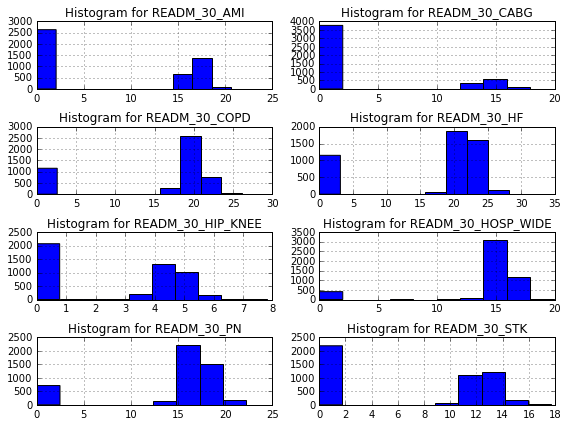

In [1354]:
    plt.figure(figsize=(8,6));
    i = 0
    for x in tar_col:
        i += 1
        plt.subplot(4,2,i)
        target[x].hist()
        plt.title('Histogram for %s' % x)
        plt.tight_layout()

In [815]:
    plt.figure(figsize=(8,6));
    i = 0
    for x in tar_col:
        i += 1
        plt.subplot(4,2,i)
        (target[target[x] > 0])[x].hist()
        plt.title('Histogram with no NaNs for %s' % x)
        plt.tight_layout()

In [1355]:
z = target[target['READM_30_AMI'] > 0]
z.head()

Measure ID                    Hospital Name State  READM_30_AMI  \
2              ABBOTT NORTHWESTERN HOSPITAL    MN          16.8   
3           ABILENE REGIONAL MEDICAL CENTER    TX          16.4   
4                ABINGTON MEMORIAL HOSPITAL    PA          18.1   
6                   ABRAZO ARROWHEAD CAMPUS    AZ          16.5   
7                     ABRAZO CENTRAL CAMPUS    AZ          16.1   

Measure ID  READM_30_CABG  READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  \
2                    13.4           20.4         22.5                4.4   
3                    15.0           18.3         22.4                4.0   
4                    13.9           22.8         21.6                5.4   
6                    14.6           19.7         21.1                4.5   
7                    14.0           19.6         21.8                4.8   

Measure ID  READM_30_HOSP_WIDE  READM_30_PN  READM_30_STK  
2                         15.0         19.6          13.7  
3                         14.5         15.5          13.5  
4                         16.2         16.2          12.3  
6                         15.4         15.4          11.8  
7                         16.1         17.6          12.0

In [1467]:
#target and features arent the same length. Merging to make them same length
full = pd.merge(features, target, on=['Hospital Name','State'], how='inner', copy=True)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 71 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

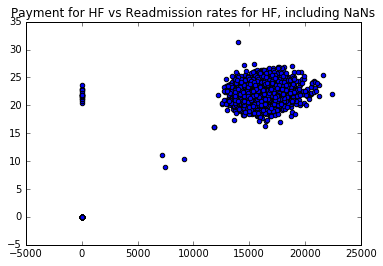

In [1363]:
plt.scatter(full['PAYM_30_HF'], full['READM_30_HF'])
plt.title('Payment for HF vs Readmission rates for HF, including NaNs')

In [1365]:
plt.scatter(full['PSI_4_SURG_COMP'], full['READM_30_HIP_KNEE'])
plt.title('Surgical Complications vs Readmission rates for Knee/Hip, including NaNs')

## So far I've left missing values in and I'm going to train a model with that - just to see if the missing values are useful info

## Trying linear model for HF using intuition to select features:
#### 1) Need to normalize data including 0s for NaNs
#### 2) Need to normalize data including imputed means for NaNs
#### 3) Try linear regressor on a few states

In [825]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 55 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

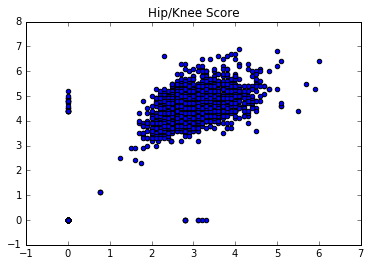

In [826]:
plt.scatter(features.COMP_HIP_KNEE, target.READM_30_HIP_KNEE)
plt.title('Hip/Knee Score')

In [954]:
features_hf_cols = ['PSI_4_SURG_COMP', 'PSI_12_POSTOP_PULMEMB_DVT', 
                     '1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
                     '1 through 30 days After Discharge from Index Hospital Admission_outpatient', 
                     'During Index Hospital Admission_inpatient','AHRQ_PSI_90_Score', 
                     'MRSA_Score', 'CAUTI_Score', 'CDI_Score', 'PAYM_30_HF', 'PAYM_30_HF_low', 'PAYM_30_HF_high']

In [927]:
features_hip_cols = ['COMP_HIP_KNEE', 'PSI_4_SURG_COMP', 'PSI_8_POST_HIP', 'COMP_HIP_KNEE_high', 'COMP_HIP_KNEE_low', 
                     '1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
                     '1 through 30 days After Discharge from Index Hospital Admission_outpatient', 
                     'During Index Hospital Admission_inpatient','AHRQ_PSI_90_Score', 
                     'MRSA_Score', 'CAUTI_Score', 'CDI_Score']

#### 1) Normalized , including 0s in place of NaNs

In [828]:
features_hip = features[features_hip_cols]
target_hip = target['READM_30_HIP_KNEE']

In [829]:
features_hip_norm = (features_hip - features_hip.mean()) /  (features_hip.std())
features_hip_norm.head()

COMP_HIP_KNEE  PSI_4_SURG_COMP  PSI_8_POST_HIP  COMP_HIP_KNEE_high  \
0       0.486446        -1.111388        0.335805            0.632840   
1       0.127055         0.687100        0.335805            0.037671   
2       0.558324         0.888585        0.335805            0.495493   
3       1.420863         1.107691        0.335805            0.953315   
4       0.270812         0.883096        0.335805            0.403929   

   COMP_HIP_KNEE_low  \
0           0.234397   
1           0.234397   
2           0.566032   
3           2.003116   
4           0.013307   

   1 through 30 days After Discharge from Index Hospital Admission_inpatient  \
0                                           0.022109                           
1                                          -0.100868                           
2                                           1.195512                           
3                                          -0.394646                           
4                                           0.942726                           

   1 through 30 days After Discharge from Index Hospital Admission_outpatient  \
0                                           0.373154                            
1                                           0.847926                            
2                                          -0.202555                            
3                                          -0.038067                            
4                                           0.309601                            

   During Index Hospital Admission_inpatient  AHRQ_PSI_90_Score  MRSA_Score  \
0                                  -0.512033           1.233494   -1.124552   
1                                   1.484239           0.889611   -0.549120   
2                                   0.628491          -1.517572    1.752610   
3                                   0.065111           1.577378   -0.261403   
4                                   1.282049          -0.829805    0.889462   

   CAUTI_Score  CDI_Score  
0    -0.365283  -1.109830  
1     1.097164   0.233801  
2    -0.072793   0.233801  
3     1.097164  -0.102107  
4     0.804675   0.233801

In [1382]:
data_to_norm = full.iloc[:,2:]
full_norm = (data_to_norm - data_to_norm.mean()) /  (data_to_norm.std()) #normalizing data

In [1383]:
full_norm.head()

COMP_HIP_KNEE  PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  \
0       0.486446                   0.869071           -1.495040   
1       0.127055                   0.271201            0.779136   
2       0.558324                  -0.569554           -0.210515   
3       1.420863                   1.784560            0.585245   
4       0.270812                  -0.546200            0.369138   

   PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  \
0             0.433730        0.541210    -0.178768        -1.111388   
1            -0.070094        1.105323    -0.673127         0.687100   
2             0.363195       -0.545229    -0.554481         0.888585   
3             1.753750       -0.294512     1.284533         1.107691   
4             0.312812       -0.252726    -0.455609         0.883096   

   PSI_6_IAT_PTX  PSI_7_CVCBI  PSI_8_POST_HIP      ...       \
0      -0.171822    -0.103954        0.335805      ...        
1      -1.049284    -0.775556        0.335805      ...        
2      -0.046470    -0.641235        0.335805      ...        
3      -1.049284    -0.506915        0.335805      ...        
4       1.332398     0.567648        0.335805      ...        

   H_COMP_7_STAR_RATING  H_RECMND_STAR_RATING  READM_30_AMI  READM_30_CABG  \
0              1.088177             -1.514558     -1.395495      -0.667697   
1              1.088177              1.691027      0.699767       1.336769   
2             -0.593895              0.088235      0.649880       1.576109   
3              0.247141              0.088235      0.861900       1.411563   
4             -1.434932             -0.713162      0.612464       1.426522   

   READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
0       0.164189     0.706534           0.332070            0.325194   
1       0.381703     0.381220           0.431423           -0.292910   
2       0.030335     0.365729           0.232717           -0.601962   
3       0.783267     0.241800           0.928190            0.448814   
4       0.247848     0.272782           0.630130            0.387004   

   READM_30_PN  READM_30_STK  
0     0.376877     -1.776802  
1     0.781138      0.755292  
2    -0.139678      0.718328  
3     0.017534      0.496538  
4     0.331959      0.441091  

[5 rows x 69 columns]

In [1544]:
full_norm.insert(0, 'Hospital Name', full_imputed['Hospital Name'])
full_norm.insert(1, 'State', full_imputed['State'])
full_norm.head()

Hospital Name State  COMP_HIP_KNEE  \
0       ABBEVILLE GENERAL HOSPITAL    LA       0.486446   
1     ABBOTT NORTHWESTERN HOSPITAL    MN       0.127055   
2  ABILENE REGIONAL MEDICAL CENTER    TX       0.558324   
3       ABINGTON MEMORIAL HOSPITAL    PA       1.420863   
4            ABRAZO CENTRAL CAMPUS    AZ       0.270812   

   PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  PSI_14_POSTOP_DEHIS  \
0                   0.869071           -1.495040             0.433730   
1                   0.271201            0.779136            -0.070094   
2                  -0.569554           -0.210515             0.363195   
3                   1.784560            0.585245             1.753750   
4                  -0.546200            0.369138             0.312812   

   PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  PSI_6_IAT_PTX      ...       \
0        0.541210    -0.178768        -1.111388      -0.171822      ...        
1        1.105323    -0.673127         0.687100      -1.049284      ...        
2       -0.545229    -0.554481         0.888585      -0.046470      ...        
3       -0.294512     1.284533         1.107691      -1.049284      ...        
4       -0.252726    -0.455609         0.883096       1.332398      ...        

   H_COMP_7_STAR_RATING  H_RECMND_STAR_RATING  READM_30_AMI  READM_30_CABG  \
0              1.088177             -1.514558     -1.395495      -0.667697   
1              1.088177              1.691027      0.699767       1.336769   
2             -0.593895              0.088235      0.649880       1.576109   
3              0.247141              0.088235      0.861900       1.411563   
4             -1.434932             -0.713162      0.612464       1.426522   

   READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
0       0.164189     0.706534           0.332070            0.325194   
1       0.381703     0.381220           0.431423           -0.292910   
2       0.030335     0.365729           0.232717           -0.601962   
3       0.783267     0.241800           0.928190            0.448814   
4       0.247848     0.272782           0.630130            0.387004   

   READM_30_PN  READM_30_STK  
0     0.376877     -1.776802  
1     0.781138      0.755292  
2    -0.139678      0.718328  
3     0.017534      0.496538  
4     0.331959      0.441091  

[5 rows x 71 columns]

#### 2) Normalized , including imputed values in place of NaNs

In [1507]:
cols_dont_fill_0 = ['Hospital Name', 'State', '1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
                    '1 to 3 days Prior to Index Hospital Admission_inpatient','During Index Hospital Admission_inpatient',
                    '1 through 30 days After Discharge from Index Hospital Admission_outpatient',
                    '1 to 3 days Prior to Index Hospital Admission_outpatient', ]

In [1508]:
cols_dont_fill_0 = cols_dont_fill_0 + tar_col
cols_dont_fill_0

['Hospital Name',
 'State',
 '1 through 30 days After Discharge from Index Hospital Admission_inpatient',
 '1 to 3 days Prior to Index Hospital Admission_inpatient',
 'During Index Hospital Admission_inpatient',
 '1 through 30 days After Discharge from Index Hospital Admission_outpatient',
 '1 to 3 days Prior to Index Hospital Admission_outpatient',
 'READM_30_AMI',
 'READM_30_CABG',
 'READM_30_COPD',
 'READM_30_HF',
 'READM_30_HIP_KNEE',
 'READM_30_HOSP_WIDE',
 'READM_30_PN',
 'READM_30_STK']

In [1509]:
full_copy = full.copy()

In [1510]:
for i in list(full_copy.columns):
    if i in cols_dont_fill_0:
        pass
    else:
        full_copy[i] = full_copy[i].replace(0, np.nan)  

In [1511]:
#Checking if the loop worked correctly

In [1512]:
len(full_copy[full_copy['1 through 30 days After Discharge from Index Hospital Admission_inpatient'] == 0])

4

In [1513]:
full_copy['1 through 30 days After Discharge from Index Hospital Admission_inpatient'].isnull().sum()

0

In [1519]:
len(full[full['CAUTI_Score'] == 0])

551

In [1514]:
full_copy['CAUTI_Score'].isnull().sum() # THere should be 551 nulls here now

551

In [1515]:
full_copy['READM_30_AMI'].isnull().sum() #Good, the zeros in the target column shouldn't be replaced

0

In [1501]:
full_copy.head()

Hospital Name State  COMP_HIP_KNEE  \
0       ABBEVILLE GENERAL HOSPITAL    LA            3.0   
1     ABBOTT NORTHWESTERN HOSPITAL    MN            2.5   
2  ABILENE REGIONAL MEDICAL CENTER    TX            3.1   
3       ABINGTON MEMORIAL HOSPITAL    PA            4.3   
4            ABRAZO CENTRAL CAMPUS    AZ            2.7   

   PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  PSI_14_POSTOP_DEHIS  \
0                       6.51                 NaN                 2.28   
1                       5.23               11.26                 1.78   
2                       3.43                6.36                 2.21   
3                       8.47               10.30                 3.59   
4                       3.48                9.23                 2.16   

   PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  PSI_6_IAT_PTX      ...       \
0            1.69         0.35              NaN           0.39      ...        
1            1.96         0.10           124.52           0.32      ...        
2            1.17         0.16           138.47           0.40      ...        
3            1.29         1.09           153.64           0.32      ...        
4            1.31         0.21           138.09           0.51      ...        

   H_COMP_7_STAR_RATING  H_RECMND_STAR_RATING  READM_30_AMI  READM_30_CABG  \
0                   4.0                   1.0           NaN            NaN   
1                   4.0                   5.0          16.8           13.4   
2                   2.0                   3.0          16.4           15.0   
3                   3.0                   3.0          18.1           13.9   
4                   1.0                   2.0          16.1           14.0   

   READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
0           19.1         24.6                4.2                16.0   
1           20.4         22.5                4.4                15.0   
2           18.3         22.4                4.0                14.5   
3           22.8         21.6                5.4                16.2   
4           19.6         21.8                4.8                16.1   

   READM_30_PN  READM_30_STK  
0         17.8           NaN  
1         19.6          13.7  
2         15.5          13.5  
3         16.2          12.3  
4         17.6          12.0  

[5 rows x 71 columns]

In [1520]:
#filling nans with imputed mean
for col in list(full_copy.columns):
    if col in cols_dont_fill_0:
        pass
    else:
        full_copy[col] = full_copy.loc[:,col].fillna(full_copy[col].mean())

In [1521]:
full_copy.head()

Hospital Name State  COMP_HIP_KNEE  \
0       ABBEVILLE GENERAL HOSPITAL    LA            3.0   
1     ABBOTT NORTHWESTERN HOSPITAL    MN            2.5   
2  ABILENE REGIONAL MEDICAL CENTER    TX            3.1   
3       ABINGTON MEMORIAL HOSPITAL    PA            4.3   
4            ABRAZO CENTRAL CAMPUS    AZ            2.7   

   PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  PSI_14_POSTOP_DEHIS  \
0                       6.51           10.238135                 2.28   
1                       5.23           11.260000                 1.78   
2                       3.43            6.360000                 2.21   
3                       8.47           10.300000                 3.59   
4                       3.48            9.230000                 2.16   

   PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  PSI_6_IAT_PTX      ...       \
0            1.69         0.35       136.591644           0.39      ...        
1            1.96         0.10       124.520000           0.32      ...        
2            1.17         0.16       138.470000           0.40      ...        
3            1.29         1.09       153.640000           0.32      ...        
4            1.31         0.21       138.090000           0.51      ...        

   H_COMP_7_STAR_RATING  H_RECMND_STAR_RATING  READM_30_AMI  READM_30_CABG  \
0                   4.0                   1.0           0.0            0.0   
1                   4.0                   5.0          16.8           13.4   
2                   2.0                   3.0          16.4           15.0   
3                   3.0                   3.0          18.1           13.9   
4                   1.0                   2.0          16.1           14.0   

   READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
0           19.1         24.6                4.2                16.0   
1           20.4         22.5                4.4                15.0   
2           18.3         22.4                4.0                14.5   
3           22.8         21.6                5.4                16.2   
4           19.6         21.8                4.8                16.1   

   READM_30_PN  READM_30_STK  
0         17.8           0.0  
1         19.6          13.7  
2         15.5          13.5  
3         16.2          12.3  
4         17.6          12.0  

[5 rows x 71 columns]

In [1523]:
full_copy['READM_30_CABG'].isnull().sum() #Good still works

0

In [1524]:
full_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 71 columns):
Hospital Name                                                                 2668 non-null object
State                                                                         2668 non-null object
COMP_HIP_KNEE                                                                 2668 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2668 non-null float64
PSI_13_POST_SEPSIS                                                            2668 non-null float64
PSI_14_POSTOP_DEHIS                                                           2668 non-null float64
PSI_15_ACC_LAC                                                                2668 non-null float64
PSI_3_ULCER                                                                   2668 non-null float64
PSI_4_SURG_COMP                                                               2668 non-null flo

In [1540]:
full_imputed = full_copy
imputed_data_norm = full_imputed.iloc[:,2:]
full_imputed_norm = (imputed_data_norm - imputed_data_norm.mean()) /  (imputed_data_norm.std()) #normalizing data

In [1541]:
full_imputed_norm.head()

COMP_HIP_KNEE  PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  \
0      -0.087153                   0.877855        5.684610e-14   
1      -1.068678                   0.137749        5.450206e-01   
2       0.109152                  -0.903026       -2.068436e+00   
3       2.464812                   2.011144        3.299643e-02   
4      -0.676068                  -0.874116       -5.376972e-01   

   PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  \
0            -0.109863        0.539315    -0.208144     3.795426e-14   
1            -1.562434        1.112163    -0.708403    -8.484439e-01   
2            -0.313223       -0.563948    -0.588341     1.320184e-01   
3             3.695873       -0.309349     1.272625     1.198227e+00   
4            -0.458480       -0.266916    -0.488289     1.053105e-01   

   PSI_6_IAT_PTX  PSI_7_CVCBI  PSI_8_POST_HIP      ...       \
0      -0.194693    -0.115466        0.053412      ...        
1      -1.108046    -0.794907        0.053412      ...        
2      -0.064214    -0.659019        0.053412      ...        
3      -1.108046    -0.523131        0.053412      ...        
4       1.371056     0.563976        0.053412      ...        

   H_COMP_7_STAR_RATING  H_RECMND_STAR_RATING  READM_30_AMI  READM_30_CABG  \
0              1.146366             -2.007962     -1.395495      -0.667697   
1              1.146366              1.884814      0.699767       1.336769   
2             -0.879900             -0.061574      0.649880       1.576109   
3              0.133233             -0.061574      0.861900       1.411563   
4             -1.893033             -1.034768      0.612464       1.426522   

   READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
0       0.164189     0.706534           0.332070            0.325194   
1       0.381703     0.381220           0.431423           -0.292910   
2       0.030335     0.365729           0.232717           -0.601962   
3       0.783267     0.241800           0.928190            0.448814   
4       0.247848     0.272782           0.630130            0.387004   

   READM_30_PN  READM_30_STK  
0     0.376877     -1.776802  
1     0.781138      0.755292  
2    -0.139678      0.718328  
3     0.017534      0.496538  
4     0.331959      0.441091  

[5 rows x 69 columns]

In [1542]:
full_imputed_norm.insert(0, 'Hospital Name', full_imputed['Hospital Name'])
full_imputed_norm.insert(1, 'State', full_imputed['State'])

In [1543]:
full_imputed_norm.head()

Hospital Name State  COMP_HIP_KNEE  \
0       ABBEVILLE GENERAL HOSPITAL    LA      -0.087153   
1     ABBOTT NORTHWESTERN HOSPITAL    MN      -1.068678   
2  ABILENE REGIONAL MEDICAL CENTER    TX       0.109152   
3       ABINGTON MEMORIAL HOSPITAL    PA       2.464812   
4            ABRAZO CENTRAL CAMPUS    AZ      -0.676068   

   PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  PSI_14_POSTOP_DEHIS  \
0                   0.877855        5.684610e-14            -0.109863   
1                   0.137749        5.450206e-01            -1.562434   
2                  -0.903026       -2.068436e+00            -0.313223   
3                   2.011144        3.299643e-02             3.695873   
4                  -0.874116       -5.376972e-01            -0.458480   

   PSI_15_ACC_LAC  PSI_3_ULCER  PSI_4_SURG_COMP  PSI_6_IAT_PTX      ...       \
0        0.539315    -0.208144     3.795426e-14      -0.194693      ...        
1        1.112163    -0.708403    -8.484439e-01      -1.108046      ...        
2       -0.563948    -0.588341     1.320184e-01      -0.064214      ...        
3       -0.309349     1.272625     1.198227e+00      -1.108046      ...        
4       -0.266916    -0.488289     1.053105e-01       1.371056      ...        

   H_COMP_7_STAR_RATING  H_RECMND_STAR_RATING  READM_30_AMI  READM_30_CABG  \
0              1.146366             -2.007962     -1.395495      -0.667697   
1              1.146366              1.884814      0.699767       1.336769   
2             -0.879900             -0.061574      0.649880       1.576109   
3              0.133233             -0.061574      0.861900       1.411563   
4             -1.893033             -1.034768      0.612464       1.426522   

   READM_30_COPD  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  \
0       0.164189     0.706534           0.332070            0.325194   
1       0.381703     0.381220           0.431423           -0.292910   
2       0.030335     0.365729           0.232717           -0.601962   
3       0.783267     0.241800           0.928190            0.448814   
4       0.247848     0.272782           0.630130            0.387004   

   READM_30_PN  READM_30_STK  
0     0.376877     -1.776802  
1     0.781138      0.755292  
2    -0.139678      0.718328  
3     0.017534      0.496538  
4     0.331959      0.441091  

[5 rows x 71 columns]

#### Try linear regressor on a few states

#### Normalized, including 0s

In [1566]:
len(full_norm.State.unique())

50

In [1567]:
trial_states = ['CA','FL','TX','IL']

In [1568]:
trial_state_dbs = {} # Dict of state by state datasets
full_hf = full_norm[features_hf_cols]
for i in state: 
    state_dbs[i] = full_norm[full_norm['State'] == i]

In [1631]:
trial_state_features = {}
trial_state_target = {}
for i in trial_states:

    trial_state_features[i] = full_norm[full_norm['State'] == i][features_hf_cols]
    trial_state_target[i] = full_norm[full_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [1570]:
trial_state_features['CA'].head()

PSI_4_SURG_COMP  PSI_12_POSTOP_PULMEMB_DVT  \
16         1.207205                  -0.368707   
18        -1.111388                  -2.171659   
29         0.787048                  -0.508833   
33        -1.111388                   0.168442   
40        -1.111388                  -0.368707   

    1 through 30 days After Discharge from Index Hospital Admission_inpatient  \
16                                          -0.702941                           
18                                          -1.291351                           
29                                           0.383353                           
33                                          -0.646577                           
40                                           2.368914                           

    1 through 30 days After Discharge from Index Hospital Admission_outpatient  \
16                                           0.780635                            
18                                          -0.916583                            
29                                          -0.109096                            
33                                          -0.744618                            
40                                          -0.135264                            

    During Index Hospital Admission_inpatient  AHRQ_PSI_90_Score  MRSA_Score  \
16                                  -0.299876          -0.829805    0.026313   
18                                  -1.429009           0.201845   -1.124552   
29                                  -0.008931           1.577378    0.314029   
33                                  -0.442738           0.201845   -0.836836   
40                                  -0.237225          -1.173688    0.601745   

    CAUTI_Score  CDI_Score  PAYM_30_HF  PAYM_30_HF_low  PAYM_30_HF_high  
16     1.682143  -0.102107   -0.121634       -0.046327        -0.189601  
18    -1.242751  -1.109830   -2.950356       -2.914035        -2.961179  
29    -0.365283   1.577432    0.715972        0.763262         0.665441  
33    -0.950261   1.577432    0.303772        0.246153         0.349896  
40    -0.950261   1.241524    1.192776        1.051790         1.302673

In [1571]:
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import cross_val_score 
from sklearn.metrics import (auc, roc_curve, roc_auc_score,
                             accuracy_score, precision_score,
                             recall_score, f1_score, )
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [1572]:
regr = linear_model.LinearRegression()

In [1573]:
rf = RandomForestClassifier()

In [1574]:
trial_state_models_lreg = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features[i], 
                                                        trial_state_target[i], test_size=.2, random_state=1)
    regr = linear_model.LinearRegression()
    trial_state_models_lreg[i]  = regr.fit(X_train, y_train)

In [1575]:
trial_state_models_lreg['CA'].coef_

array([ 0.05397115,  0.03849826, -0.05312098,  0.05656381, -0.12241763,
       -0.02928543,  0.01631132,  0.02450052, -0.05793285,  4.9103641 ,
       -2.37315389, -1.69388239])

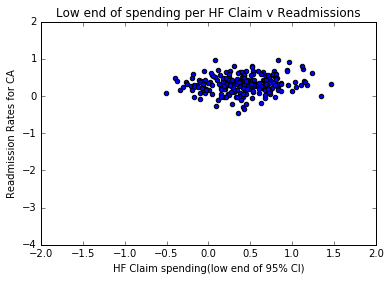

In [1576]:
plt.scatter((trial_state_features['CA']['PAYM_30_HF_low']), trial_state_target['CA'])
plt.xlim(-2,2)
plt.xlabel('HF Claim spending(low end of 95% CI)')
plt.ylabel('Readmission Rates for CA')
plt.title('Low end of spending per HF Claim v Readmissions')
plt.show()

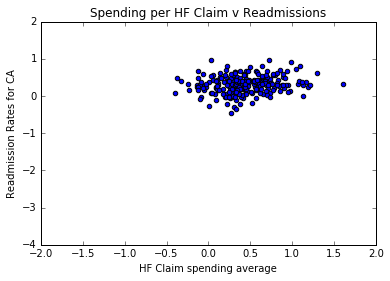

In [1577]:
plt.scatter((trial_state_features['CA']['PAYM_30_HF']), trial_state_target['CA'])
plt.xlim(-2,2)
plt.xlabel('HF Claim spending average')
plt.ylabel('Readmission Rates for CA')
plt.title('Spending per HF Claim v Readmissions')
plt.show()

In [1578]:
trial_state_models_lreg['TX'].coef_

array([  2.34060832e-04,   1.77249400e-01,  -9.37614117e-02,
         1.30047461e-01,  -1.18601302e-01,  -9.88832479e-02,
         4.85436977e-02,   1.11961908e-02,   2.12244128e-02,
         1.15609865e+00,  -7.88827880e-01,   3.91175944e-01])

In [974]:
state_model_aves = {}
for i in state:
    state_model_aves[i] = state_target[i].mean()

In [977]:
import gzip
import dill

In [979]:
with gzip.open('state_model_aves.dill.gz', 'w') as ff:
   dill.dump(state_model_aves, ff)

In [1088]:
list1 = []
for i in state:
    
    list1.append(state_target[i].mean())
print list1

[-0.26234761854532407, 0.1400012336961712, -0.3838899956798176, 0.07211268962921094, -0.29174981918704845, 0.11824889849747727, -0.006559897584386458, 0.396576469285159, 0.2955426492097114, -0.18643842308985917, -0.11304339829614157, 0.0926980010416913, 0.1148164798967677, 0.2321180551812111, 0.0922305966456297, 0.2862273581635561, -0.3324396832046315, -0.738156591142638, -0.046954419854727564, -0.4036632102235432, -0.002959647215145779, -0.02190924630491001, 0.3714361940764768, -0.14503532143351353, 0.0832438633835376, 0.04079331286441076, 0.3061158021699443, 0.37092730185013456, -0.9258429500331334, 0.3634052728292588, 0.430849006837903, 0.1467017565803016, 0.09684740741489133, 0.2665857907879256, 0.2630160985804887, 0.004193603928613852, 0.19532665200550445, -0.5037100083329208, -0.5854256511758059, -0.14836609915952628, -0.4265310497914009, -0.04013832831901767, 0.17579437388933988, 0.21815566671840833, 0.26374575264804656, 0.2560994961176028, -0.49660991298322305, -0.7393040813001

In [1081]:
important_features

{'AK': 'CDI_Score',
 'AL': 'PAYM_30_HF',
 'AR': 'PAYM_30_HF',
 'AZ': 'PAYM_30_HF',
 'CA': 'PAYM_30_HF',
 'CO': 'PAYM_30_HF',
 'CT': 'PAYM_30_HF',
 'DC': 'PSI_12_POSTOP_PULMEMB_DVT',
 'DE': 'CAUTI_Score',
 'FL': 'PAYM_30_HF',
 'GA': 'PAYM_30_HF',
 'HI': 'During Index Hospital Admission_inpatient',
 'IA': 'PAYM_30_HF',
 'ID': 'During Index Hospital Admission_inpatient',
 'IL': 'PAYM_30_HF',
 'IN': 'PAYM_30_HF',
 'KS': 'PAYM_30_HF',
 'KY': 'PAYM_30_HF',
 'LA': 'PAYM_30_HF',
 'MA': 'PAYM_30_HF',
 'ME': 'PAYM_30_HF',
 'MI': 'PAYM_30_HF',
 'MN': 'PAYM_30_HF',
 'MO': 'PAYM_30_HF',
 'MS': 'PAYM_30_HF',
 'MT': 'PAYM_30_HF_high',
 'NC': 'PAYM_30_HF',
 'ND': 'CDI_Score',
 'NE': 'PAYM_30_HF_low',
 'NH': '1 through 30 days After Discharge from Index Hospital Admission_inpatient',
 'NJ': 'PAYM_30_HF',
 'NM': 'PAYM_30_HF',
 'NV': 'PAYM_30_HF',
 'NY': 'PAYM_30_HF',
 'OH': 'PAYM_30_HF_high',
 'OK': 'PAYM_30_HF',
 'OR': 'PAYM_30_HF',
 'PA': 'PAYM_30_HF_high',
 'RI': '1 through 30 days After Discharge fr

In [1580]:
trial_state_coef = {}
for i in trial_states: 
    features_hf_cols
    trial_state_coef[i] = {z[0]:z[1] for z in zip(features_hf_cols, np.absolute(trial_state_models_lreg[i].coef_))}

In [1582]:
import operator
important_features = {}
for i in trial_states:
    important_features[i] = max(trial_state_coef[i].iteritems(), key=operator.itemgetter(1))[0]

In [1079]:
with gzip.open('important_features.dill.gz', 'w') as fff:
   dill.dump(important_features, fff)

In [1586]:
important_feature['IL']

'PAYM_30_HF'

In [1588]:
#Model eval. I want to loop through the values of state targets
score = []
for i in trial_states:
    
    scores = cross_val_score(trial_state_models_lreg[i], trial_state_features[i], trial_state_target[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score.append(scores)
print score

[-0.29316211061291375, -0.094994583166150143, -0.19335708296967929, -0.19613949450400542]


In [1589]:
score_r2 = []
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features[i], trial_state_target[i], test_size=.2, 
                                                        random_state=1)
    scores_r2 = trial_state_models_lreg[i].score(X_train, y_train, sample_weight=None)
    score_r2.append(scores_r2)
print score_r2

[0.84216119422064573, 0.60329497836337165, 0.91068669597470886, 0.21141135971834379]


### Linear Reg-Including 0s insteAd of NaNs - CA predictions

In [1590]:
CA = pd.DataFrame()
CA['Actual_Rates'] = trial_state_target['CA']

In [1591]:
CA['Predicted_Rates'] = trial_state_models_lreg['CA'].predict(trial_state_features['CA'])

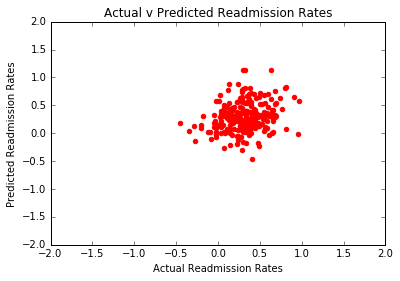

In [1594]:
plt.scatter(CA['Actual_Rates'], CA['Predicted_Rates'], color='red')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('Actual Readmission Rates')
plt.ylabel('Predicted Readmission Rates')
plt.title('Actual v Predicted Readmission Rates')
plt.show()

### Linear regression on normalized data with imputed means instead of NaNs

In [1629]:
trial_state_dbs_impute_norm = {} # Dict of state by state datasets
full_hf_impute = full_imputed_norm[features_hf_cols]
for i in trial_states: 
    trial_state_dbs_impute_norm[i] = full_imputed_norm[full_imputed_norm['State'] == i]

In [1630]:
trial_state_features_imp_lr = {}
trial_state_target_imp_lr  = {}
for i in trial_states:

    trial_state_features_imp_lr [i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_lr [i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [1624]:
trial_state_models_lreg_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_lr[i], 
                                                        trial_state_target_imp_lr[i], test_size=.2, random_state=1)
    regr = linear_model.LinearRegression()
    trial_state_models_lreg_imp[i]  = regr.fit(X_train, y_train)

In [1627]:
score_lreg_imp = []
for i in trial_states:
    
    scores_lreg_imp = cross_val_score(trial_state_models_lreg_imp[i], trial_state_features_imp_lr[i], 
                                      trial_state_target_imp_lr[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_lreg_imp.append(scores_lreg_imp)
print score_lreg_imp

[-1.8607659580386673, -0.24473769603412046, -1.0464303618559518, -0.1721699491934596]


### Ridge regression on normalized data with imputed means instead of NaNs

In [1628]:
from sklearn import linear_model

In [1632]:
trial_state_features_imp_ridge = {}
trial_state_target_imp_ridge  = {}
for i in trial_states:

    trial_state_features_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [1633]:
trial_state_models_ridge_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_ridge[i], 
                                                        trial_state_target_imp_ridge[i], test_size=.2, random_state=1)
    ridge = linear_model.Ridge (alpha = .5)
    trial_state_models_ridge_imp[i]  = ridge.fit(X_train, y_train)

In [1634]:
score_ridge_imp = []
for i in trial_states:
    
    scores_ridge_imp = cross_val_score(trial_state_models_ridge_imp[i], trial_state_features_imp_ridge[i], 
                                      trial_state_target_imp_ridge[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_ridge_imp.append(scores_ridge_imp)
print score_ridge_imp

[-1.8635997244952454, -0.24173410350438354, -1.0370099805456658, -0.17029192724876821]


In [1632]:
trial_state_features_imp_ridge = {}
trial_state_target_imp_ridge  = {}
for i in trial_states:

    trial_state_features_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

trial_state_models_ridge_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_ridge[i], 
                                                        trial_state_target_imp_ridge[i], test_size=.2, random_state=1)
    ridge = linear_model.Ridge (alpha = .5)
    trial_state_models_ridge_imp[i]  = ridge.fit(X_train, y_train)

In [1633]:
trial_state_models_ridge_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_ridge[i], 
                                                        trial_state_target_imp_ridge[i], test_size=.2, random_state=1)
    ridge = linear_model.Ridge (alpha = .5)
    trial_state_models_ridge_imp[i]  = ridge.fit(X_train, y_train)

In [1634]:
score_ridge_imp = []
for i in trial_states:
    
    scores_ridge_imp = cross_val_score(trial_state_models_ridge_imp[i], trial_state_features_imp_ridge[i], 
                                      trial_state_target_imp_ridge[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_ridge_imp.append(scores_ridge_imp)
print score_ridge_imp

[-1.8635997244952454, -0.24173410350438354, -1.0370099805456658, -0.17029192724876821]


### Support Vector regression on normalized data with imputed means instead of NaNs

In [1649]:
from sklearn.svm import SVR

In [1650]:
trial_state_features_imp_SVR = {}
trial_state_target_imp_SVR  = {}
for i in trial_states:

    trial_state_features_imp_SVR[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_SVR[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

#### Linear SVR

In [1652]:
trial_state_models_SVRl_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_SVR[i], 
                                                        trial_state_target_imp_SVR[i], test_size=.2, random_state=1)
    svr_lin = SVR(kernel='linear')
    trial_state_models_SVRl_imp[i]  = svr_lin.fit(X_train, y_train)

In [1647]:
h = SVR()

NameError: name 'SVR' is not defined

In [1653]:
score_SVRl_imp = []
for i in trial_states:
    
    scores_SVRl_imp = cross_val_score(trial_state_models_SVRl_imp[i], trial_state_features_imp_SVR[i], 
                                      trial_state_target_imp_SVR[i], cv=5, scoring='mean_squared_error').mean()
    score_SVRl_imp.append(scores_SVRl_imp)
print score_SVRl_imp

[-1.712942609288282, -0.24579555597943553, -1.213565858688213, -0.15550077886775157]


#### Nonlinear SVR

In [1654]:
trial_state_models_SVRnl_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_SVR[i], 
                                                        trial_state_target_imp_SVR[i], test_size=.2, random_state=1)
    svr_nlin = SVR(kernel='poly')
    trial_state_models_SVRnl_imp[i]  = svr_nlin.fit(X_train, y_train)

In [1655]:
score_SVRnl_imp = []
for i in trial_states:
    
    scores_SVRnl_imp = cross_val_score(trial_state_models_SVRnl_imp[i], trial_state_features_imp_SVR[i], 
                                      trial_state_target_imp_SVR[i], cv=5, scoring='mean_squared_error').mean()
    score_SVRnl_imp.append(scores_SVRnl_imp)
print score_SVRnl_imp

[-1.5624360109049944, -0.23472320357121007, -2.143422337125358, -0.19372244470769812]


### RF regression on normalized data with imputed means instead of NaNs

In [1657]:
from sklearn.ensemble import RandomForestRegressor

In [1658]:
trial_state_features_imp_rf = {}
trial_state_target_imp_rf  = {}
for i in trial_states:

    trial_state_features_imp_rf[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_rf[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [1659]:
trial_state_models_rf_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_rf[i], 
                                                        trial_state_target_imp_rf[i], test_size=.2, random_state=1)
    rf = RandomForestRegressor()
    trial_state_models_rf_imp[i]  = rf.fit(X_train, y_train)

In [1660]:
score_rf_imp = []
for i in trial_states:
    
    scores_rf_imp = cross_val_score(trial_state_models_rf_imp[i], trial_state_features_imp_rf[i], 
                                      trial_state_target_imp_rf[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_rf_imp.append(scores_rf_imp)
print score_rf_imp

[-1.1949162068121504, -0.1963138782786974, -0.57532710460058067, -0.18344021816948328]


### RF using imputed, non-normalized data

In [1599]:
trial_state_dbs_rf = {} # Dict of state by state datasets
full_hf_rf = full_imputed[features_hf_cols]

for i in trial_states: 
    trial_state_dbs_rf = full_imputed[full_imputed['State'] == i]

In [1600]:
trial_state_features_rf = {}
trial_state_target_rf = {}
for i in trial_states:

    trial_state_features_rf[i] = full_imputed[full_imputed['State'] == i][features_hf_cols]
    trial_state_target_rf[i] = full_imputed[full_imputed['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [1614]:
trial_state_models_rf = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_rf[i], trial_state_target_rf[i], 
                                                        test_size=.2, random_state=1)
    trial_state_models_rf[i]  = rf.fit(X_train, y_train)

In [ ]:
# regressor = RandomForestRegressor(oob_score=True)

# regressor.fit(x,y)

# out_of_bag_prediction_for_x = regressor.oob_prediction_

# print(your_error_metric(out_of_bag_prediction_for_x, x))

In [1616]:
score_rf = []
for i in trial_states:
    
    scores_rf = cross_val_score(trial_state_models_rf[i], trial_state_features_rf[i], trial_state_target_rf[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_rf.append(scores_rf)
print score_rf

[-38.901141826789186, -11.157424712643676, -26.306528546938779, -7.7858178095238113]


### Selecting features

In [1662]:
features_hf_cols

['PSI_4_SURG_COMP',
 'PSI_12_POSTOP_PULMEMB_DVT',
 '1 through 30 days After Discharge from Index Hospital Admission_inpatient',
 '1 through 30 days After Discharge from Index Hospital Admission_outpatient',
 'During Index Hospital Admission_inpatient',
 'AHRQ_PSI_90_Score',
 'MRSA_Score',
 'CAUTI_Score',
 'CDI_Score',
 'PAYM_30_HF',
 'PAYM_30_HF_low',
 'PAYM_30_HF_high']

In [1670]:
features_hf_cols = ['1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
                    '1 to 3 days Prior to Index Hospital Admission_inpatient ', 'During Index Hospital Admission_inpatient',
                   '1 through 30 days After Discharge from Index Hospital Admission_outpatient',
                   '1 to 3 days Prior to Index Hospital Admission_outpatient', 'AHRQ_PSI_90_Score', 'CLABSI_Score',
                   'CAUTI_Score', 'SSI_Score', 'MRSA_Score','CDI_Score', 'PAYM_30_HF', 'PAYM_30_HF_low','PAYM_30_HF_high',
                   'H_COMP_1_STAR_RATING','H_COMP_2_STAR_RATING','H_COMP_3_STAR_RATING','H_COMP_4_STAR_RATING',
                    'H_COMP_5_STAR_RATING','H_COMP_6_STAR_RATING','H_COMP_7_STAR_RATING','H_RECMND_STAR_RATING']

#### Trying RF again with new features

In [1614]:
trial_state_models_rf = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_rf[i], trial_state_target_rf[i], 
                                                        test_size=.2, random_state=1)
    trial_state_models_rf[i]  = rf.fit(X_train, y_train)

In [1616]:
score_rf = []
for i in trial_states:
    
    scores_rf = cross_val_score(trial_state_models_rf[i], trial_state_features_rf[i], trial_state_target_rf[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_rf.append(scores_rf)
print score_rf

[-38.901141826789186, -11.157424712643676, -26.306528546938779, -7.7858178095238113]
